## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Problem Understanding

- The business is looking for conversion of liability customers to asset customers, the success metric for that is getting those customers to apply for personal loans as they haven't applied for them yet. For that, its important that:
    - Identify customers who have potential to apply for personal loans, solved by a model capable of prediction
    - Attributes of customers applying for personal loan be understood, which can be understood by model interpretability and data exploration
    - Find out those customers which haven't bought personal loans but which appear to be good candidates for conversion


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# loading the dataset using pandas
personal_loan = pd.read_csv("./Loan_Modelling.csv")

In [3]:
# making a copy of the original data
data = personal_loan.copy()

## Data Overview

In [4]:
# view first 5 rows of the data

data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
# view last 5 rows of the data

data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Number of rows and columns

In [6]:
# shape method gives us a tuple of (number of rows, number of columns)

data.shape

(5000, 14)

### Exploring data types and null values

In [7]:
# info() gives us a summary of the dataset including the data types and non-null counts

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Overall Statistical Summary

In [8]:
# describe() shows the statistical summary of numerical columns in the dataset, .T takes the transpose for better readability

data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* Observations:
    * The dataset has 5000 observations across about 13 variables
    * From the info method all data types we have are of numerical type, there is no categorical type
    * It can be safely assumed from this that null values are not present. Output of isnull() also confirms the same
    * Analyzing the data dictionary and exploring head() and tail(), we find that there are some columns that are categorial but their values are being represented numerically:
        - ZIPCode
        - Education
        - Securities_Account
        - CD_Account
        - Online
        - CreditCard
    * Personal_Loan (categorical) is the dependent variable that needs to be predicted, which has a 0 or 1 value (Yes/No)
    * Minimum experince is -3, which seems like an incorrect value
    * Average age is 45
    * Following variables have a wide spread:
        * The range of income is from 39k to 224k
        * Range of average credit card spending is from 700 to 10k
        * Range of Mortgage is from 0 to 635k


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Dropping extraneous or redundant features

In [9]:
# dropping the 'ID' column as it is essentially just like the index

data = data.drop(['ID'], axis=1)

### Data Sanity Check

In [311]:
# checking for duplicate rows

data.duplicated().sum()

np.int64(0)

In [11]:
# checking null values

data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Check Incorrect Values

In [12]:
# find out each unique value in 'Experience' column
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [13]:
# check experience less than 0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [14]:
# replace negative values in 'Experience' column with their absolute values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [ ]:
## Converting the data type of categorical features to 'category' using the astype() method
categorical_variable = ["Education","Personal_Loan","Securities_Account","CD_Account","Online","CreditCard","ZIPCode"]
data[categorical_variable] = data[categorical_variable].astype("category")

### Checking other categorical variables and variables with low number of value counts for any strange or anomalous values 

In [17]:
print(data["Education"].unique())
print(data["Personal_Loan"].unique())
print(data["Securities_Account"].unique())
print(data["CD_Account"].unique())
print(data["Online"].unique())
print(data["CreditCard"].unique())
print(data["Family"].unique())

[1, 2, 3]
Categories (3, int64): [1, 2, 3]
[0, 1]
Categories (2, int64): [0, 1]
[1, 0]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]
[4 3 1 2]


* There are some negative values in 'Experience' columns. Since experience is never negative, it can be assumed that these are incorrectly typed
* Since the values make sense if they were positive, replacing these values in Experience column with their absolute versions
* Other columns seem to show proper values

### Outlier Detection

In [28]:
# find 25th and 75th percentiles which are known as q1 and q3 respectively using quantile() method
q1 = data.select_dtypes(include=["number"]).quantile(0.25)
q3 = data.select_dtypes(include=["number"]).quantile(0.75)

# inter quartile range (IQR) is calculated as the difference between q3 and q1
iqr = q3 - q1

In [29]:
# finding the lower and upper limit for all numerical variables, which will dictate whether a value is an outlier or not

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [30]:
upper_bound

Age            85.0
Experience     60.0
Income        186.5
Family          6.0
CCAvg           5.2
Mortgage      252.5
dtype: float64

In [31]:
lower_bound

Age             5.0
Experience    -20.0
Income        -49.5
Family         -2.0
CCAvg          -2.0
Mortgage     -151.5
dtype: float64

In [32]:
((data.select_dtypes(include=["number"]) < lower_bound)| (data.select_dtypes(include=["number"]) > upper_bound)).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

In [42]:
(data.select_dtypes(include=["number"]) < lower_bound).sum()/len(data) * 100

Age           0.0
Experience    0.0
Income        0.0
Family        0.0
CCAvg         0.0
Mortgage      0.0
dtype: float64

In [41]:
(data.select_dtypes(include=["number"]) > upper_bound).sum()/len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

### Data Preparation for Modeling

In [ ]:
# Experience is almost completely correlated with Age, hence it can be dropped
# X represents the independent variables, Y represents the target variable

X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

# performing one-hot encoding on categorical variables
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# performing type conversion for the independent variable dataframe
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [312]:
# check percentage of response variable class distribution in training and testing samples

print(f"% Distribution of response variable in training set: {y_train.value_counts(normalize=True)*100}")
print(f"% Distribution of response variable in test set: {y_test.value_counts(normalize=True)*100}")

% Distribution of response variable in training set: Personal_Loan
0    90.542857
1     9.457143
Name: proportion, dtype: float64
% Distribution of response variable in test set: Personal_Loan
0    90.066667
1     9.933333
Name: proportion, dtype: float64


- Observations & Sanity Checks

    - Value Types:
        - There are no duplicate rows
        - No missing values 
        - There were some negative values in the Experince column which appear to be a typing mistake. They were corrected accordingly

    - Feature Modification:
        - There are categorical variables whose values have been represented as numerical and are being interpreted as numerical. Their value type has been converted to categorical
        - 'ID' column represented a redundant feature which was essentially just an index/serial number starting from 1. It was removed

    - Outliers:
        - It seems all outliers lie above Q3, that is the outlier nature is towards values greater than expected
        - No values below Q1 exist for any of the numerical variables
        - Outliers are present for following features:
            - Income
            - CCAvg
            - Mortgage
        - Outlier values also don't seem to be unreasonable and do not require treatment.
    
    - Data Preparation for Modelling:
        - The independent and response variables have been separated
        - One-hot encoding for a couple of categorical variables has been performed
        - Train-test split was performed with a test sample size of 30%
        - Type conversion to ensure consistent independent variable data type
        - Verification of equal distribution of the classes in both training and testing samples

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

In [48]:
def numerical_plots(data, feature, figsize=(12, 7)):
    """
    Function to plot histogram and boxplot together for a given feature.

    data: dataset/dataframe
    feature: variable, column from the dataset
    figsize: size of figure (default (12,7))
    """

    # Following code creates 2 subplots in a single column
    # nrows = Number of rows in the subplot, which is 2 here
    # sharex = True; x-axis will be the same for both plots 
    # gridspec_kw = height ratios for both plots; boxplot will be smaller than histogram
    # f2 = figure object
    # sub_boxplot, sub_histplot = axes objects for boxplot and histogram respectively. 
    # First is for boxplot and second is for histogram
   
    f2, (sub_boxplot, sub_histplot) = plt.subplots(nrows=2,sharex=True,gridspec_kw={"height_ratios": (0.40, 0.60)},figsize=figsize)
    
    # ax= specifies the subplot where the plot will be drawn
    sns.boxplot(data=data, x=feature, ax=sub_boxplot, showmeans=True, color="yellow")
    sns.histplot(data=data, x=feature, kde=True, ax=sub_histplot, palette="magma") 
    
    sub_histplot.axvline(data[feature].mean(), color="red", linestyle="--")  # Add mean to the histogram
    sub_histplot.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [55]:
# function to create labeled barplots


def barplots(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

#### Plot for Age

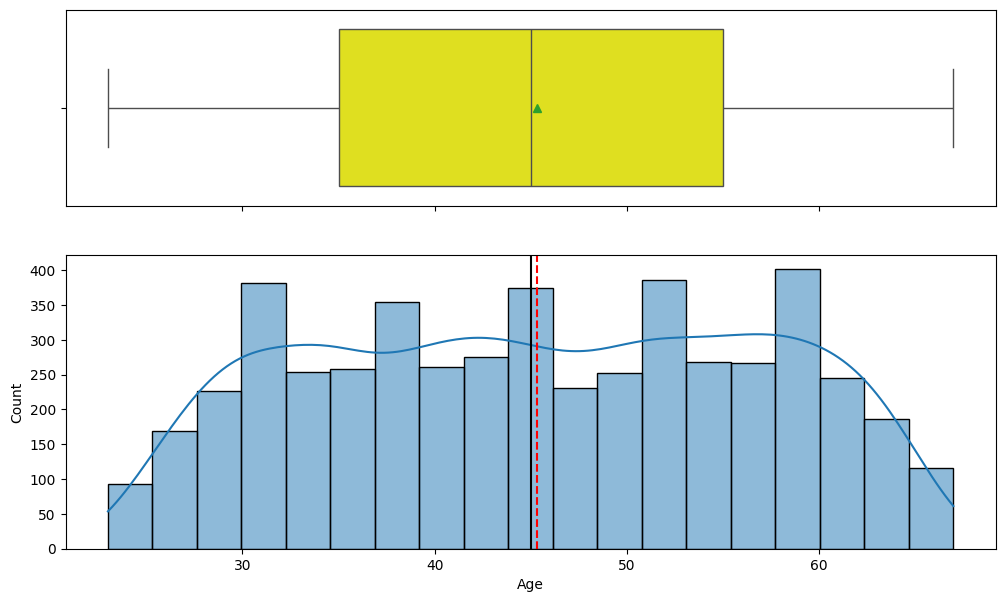

In [ ]:
# histogram and boxplot for 'Age' column
numerical_plots(data, "Age")

#### Plot for Experience

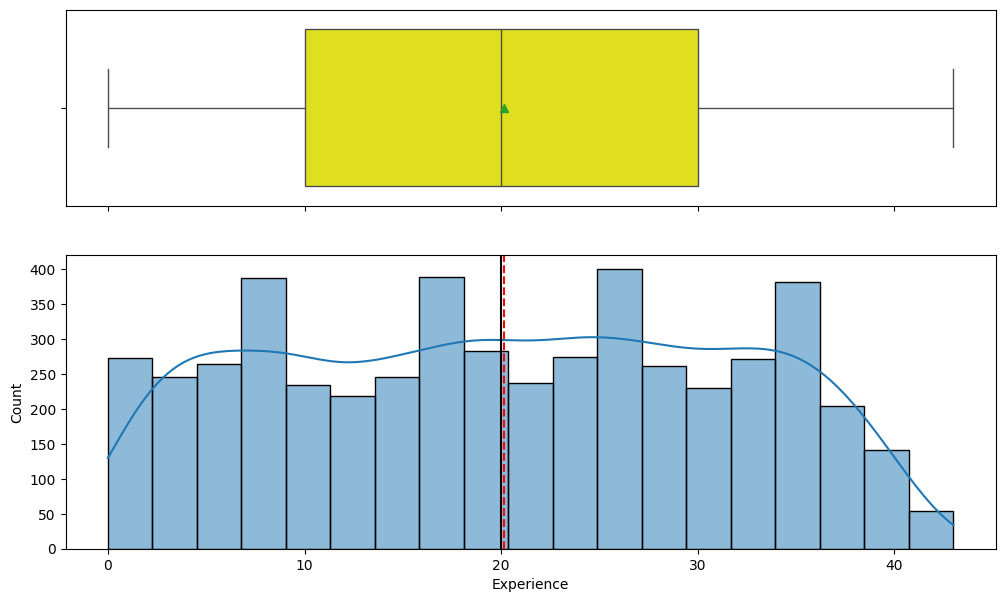

In [ ]:
# histogram and boxplot for 'Experi' column

numerical_plots(data, "Experience") 

#### Plot for Income

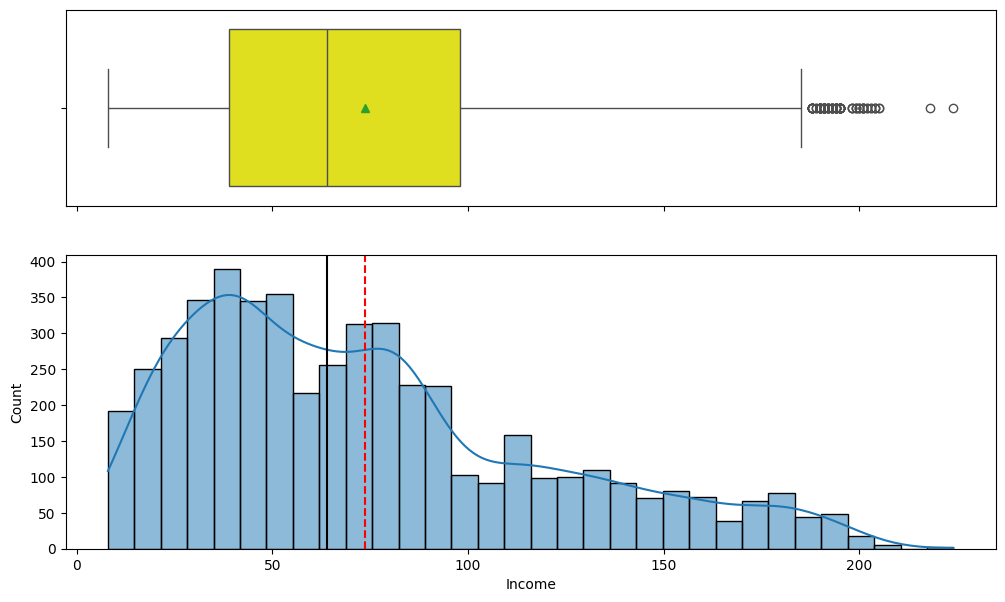

In [ ]:
# histogram and boxplot for 'Income' column

numerical_plots(data, "Income") 

#### Plot for CCAvg

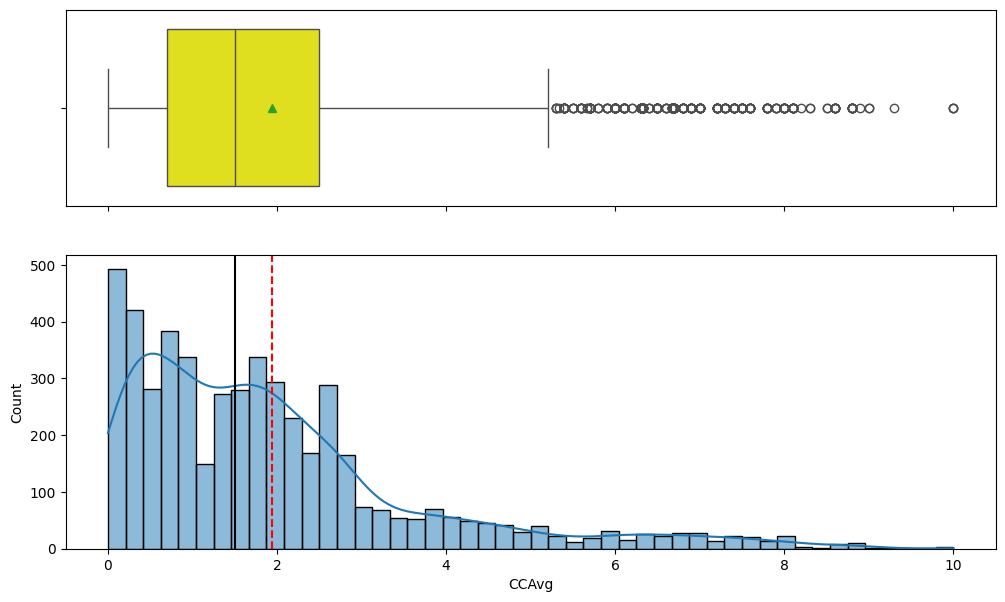

In [ ]:
# histogram and boxplot for 'CCAvg' column

numerical_plots(data, "CCAvg")

#### Plot for Mortgage

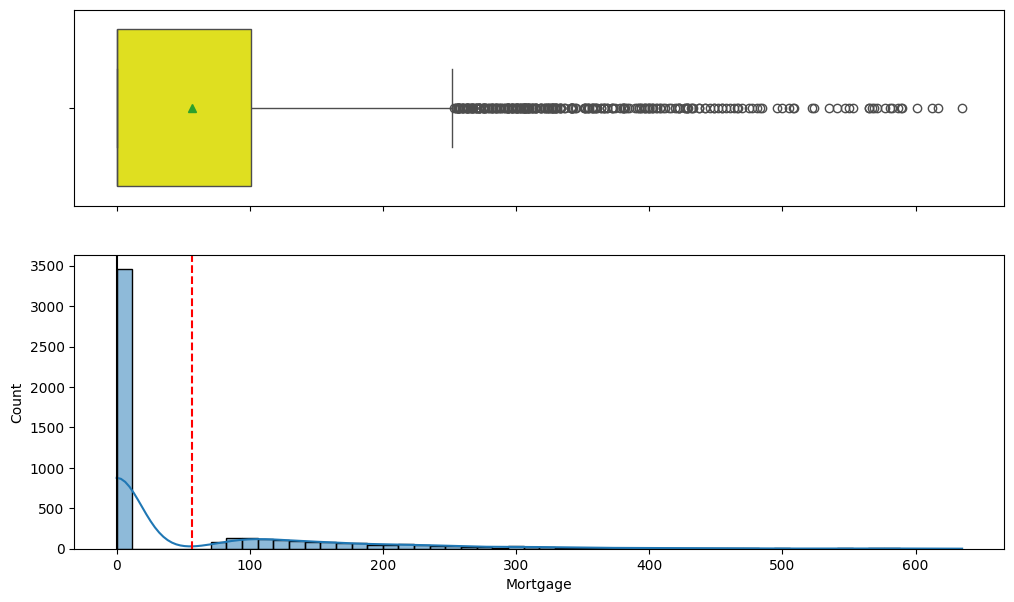

In [ ]:
# histogram and boxplot for 'Mortgage' column

numerical_plots(data, "Mortgage")

#### Plot for Family

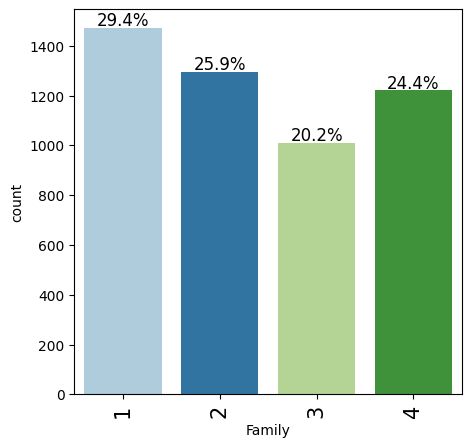

In [ ]:
# Following cells now show barplots/countplots for each variable and show the percentages at the top of each value/category

barplots(data, "Family", perc=True)

#### Plot for Education

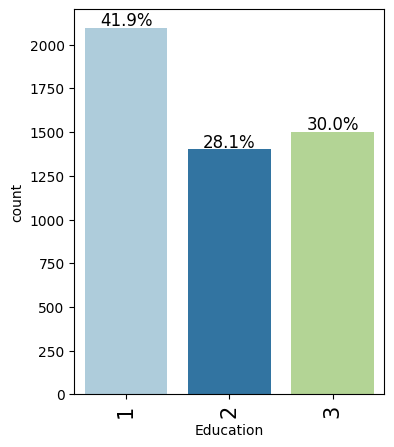

In [ ]:
barplots(data, "Education", perc=True)

#### Plot for Securities_Account

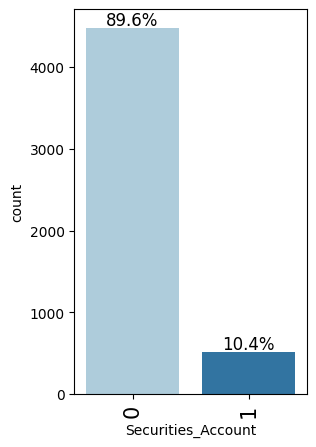

In [58]:
barplots(data, "Securities_Account", perc=True)

#### Plot for CD_Account

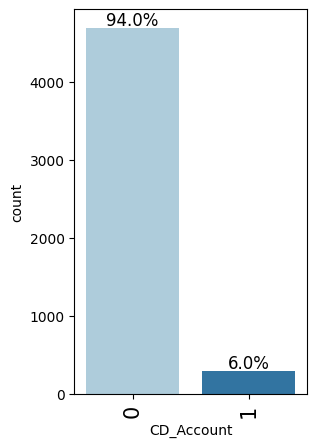

In [59]:
barplots(data, "CD_Account", perc=True)

#### Plot for Online

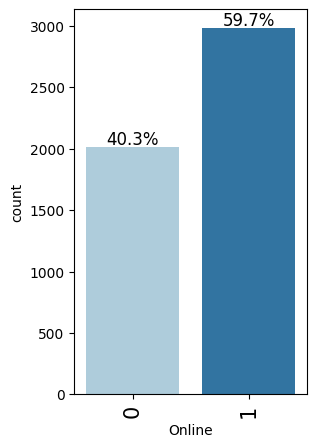

In [60]:
barplots(data, "Online", perc=True)

#### Plot for  CreditCard

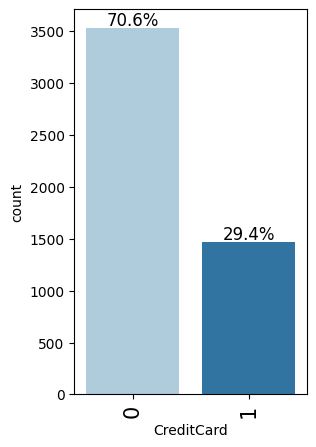

In [61]:
barplots(data, "CreditCard", perc=True)

#### Plot for ZIPCode

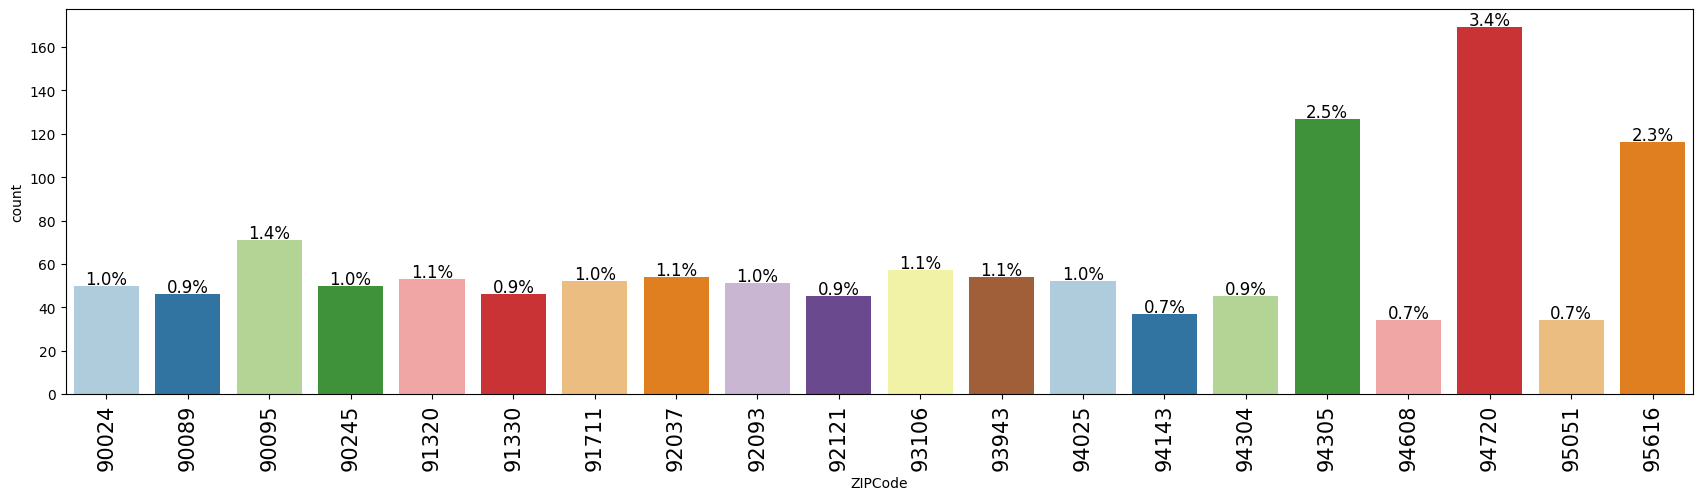

In [63]:
barplots(data, "ZIPCode", perc=True, n=20)

#### Observations:

1. Age = Symmetric distribution, mean and median around 45 and having no outliers
2. Experience = Also symmetric distribution, mean and median around 20. 3rd Quartile is around 30, and graph tapers off sharply around 40.
3. Income = Right skewed, lots of outliers on right, so there are many high income people as outliers.. mean approximately 70, median close to 65. Maximum value is around 224. 
4. Credit Card Average Spending = Also right skwed, high outliers present. Maximum 10, mean is 2 and median is around 1.5
5. Mortgage = Heavily right skewed. Median is zero, which means at least 50% of the people have zero as mortgate amount. Mean is around 60 and there are lots of outliers. Maximum value is over 600.

6. Family = Single family members are highest in proportion
7. Education = Number of undergrads is highest
8. Securities Account = 90 percent of the customers do not have a securities account
9. Certificate of Deposit = Around 94 percent of the customers do not have a certificate of deposit account
10. Online = Around 40 percent of customers do not use online banking
11. Credit Card = Around 70 percent of customers have credit cards with other banks
12. Zipcode = 3 of the observed zipcode values are above 2 percent 

### Bivariate Analysis

In [103]:
def cat_vs_response_plot(data, input, response, figsize=(12, 5)):
    """
    Plot categorical variable against response variable in a stacked bar chart
    
    data = dataframe
    input = categorical variable
    response = target variable
    """

    f2, (tab_plot, tab_normalized_plot) = plt.subplots(ncols=2,figsize=figsize)

    tab = pd.crosstab(data[input], data[response], margins=True)
    tab_normalized = pd.crosstab(data[input], data[response], normalize = 'index')
    
    print(tab)

    tab.plot(kind="bar", stacked=True, ax=tab_plot)
    tab_normalized.plot(kind="bar", stacked=True, ax=tab_normalized_plot)
    plt.legend(loc="upper right", bbox_to_anchor=(1, 1))
    plt.show()

In [113]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(data=data[data[target] == target_uniq[0]],x=predictor,kde=True,ax=axs[0, 0],color="teal",stat="density")

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(data=data[data[target] == target_uniq[1]],x=predictor,kde=True,ax=axs[0, 1],color="orange",stat="density")
    
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(data=data,x=target,y=predictor,ax=axs[1, 1],showfliers=False,palette="gist_rainbow")

    plt.tight_layout()
    plt.show()

#### Taking out correlation and plotting Heatmap

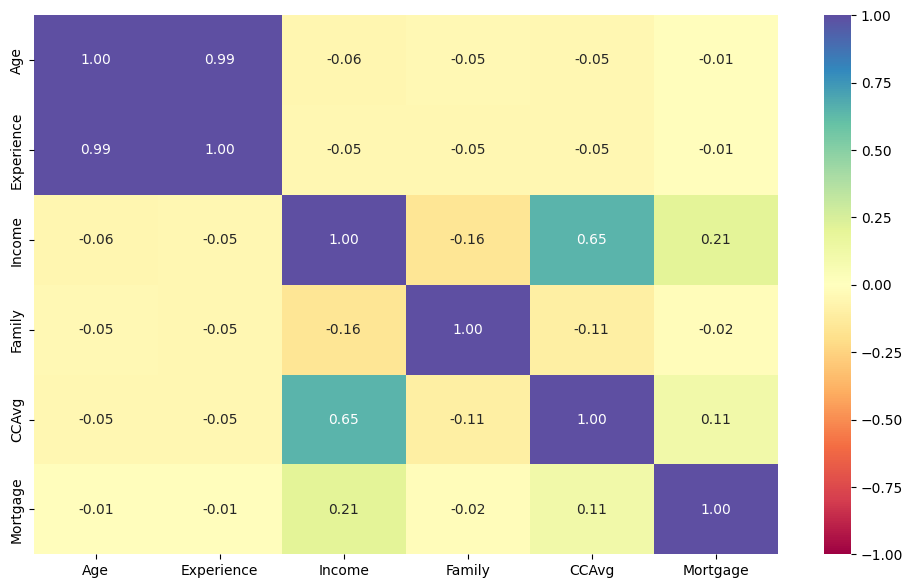

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Exploring relationship of "Personal Loan" with some categorical variables 

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000


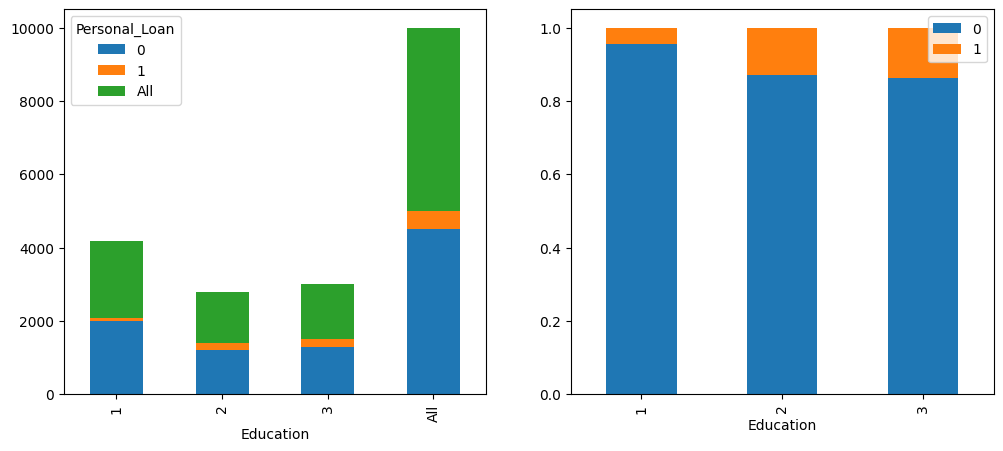

In [104]:
cat_vs_response_plot(data, "Education", "Personal_Loan")

#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000


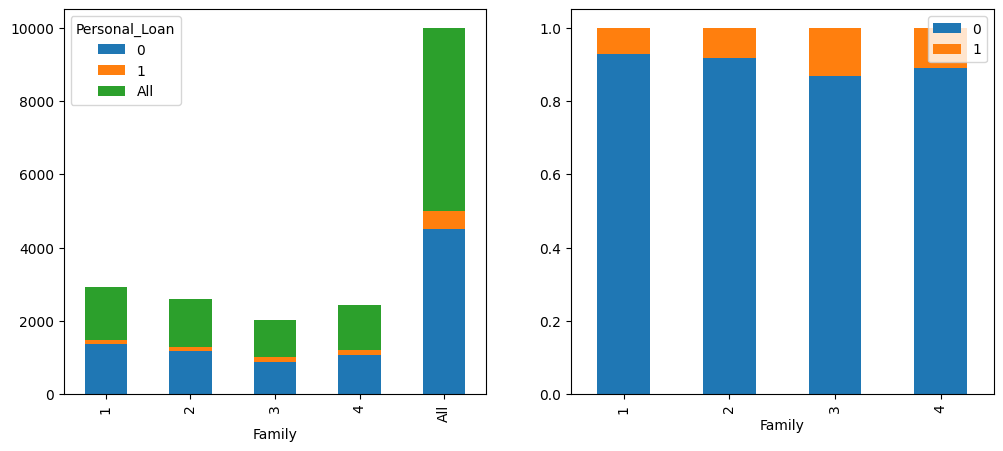

In [106]:
cat_vs_response_plot(data, 'Family', 'Personal_Loan')

#### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000


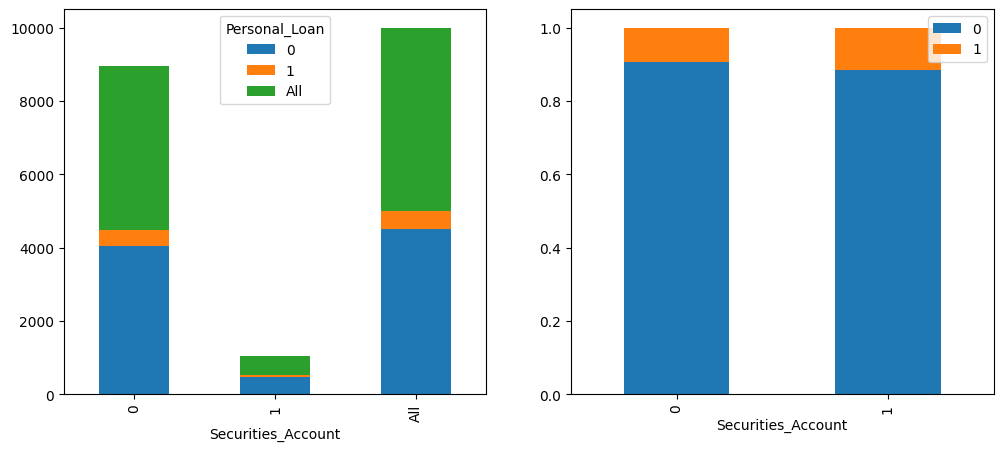

In [107]:
cat_vs_response_plot(data, 'Securities_Account', 'Personal_Loan') 

#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000


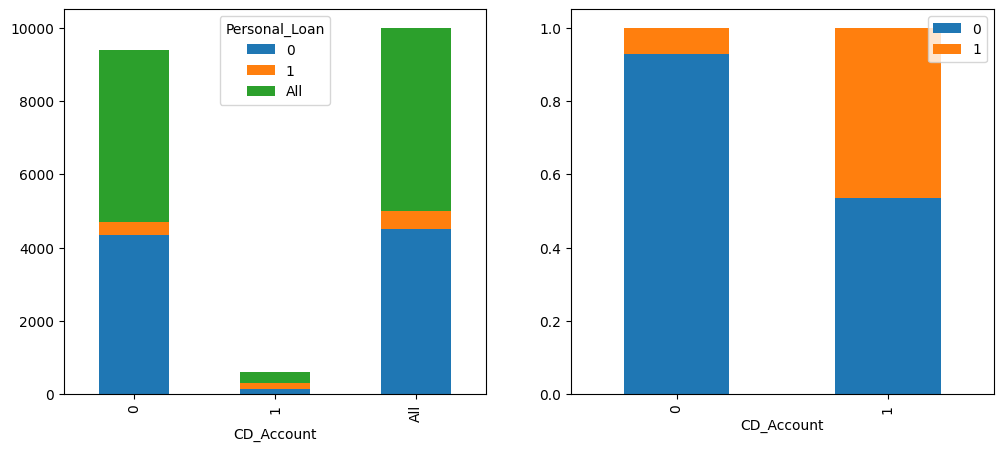

In [108]:
cat_vs_response_plot(data, 'CD_Account', 'Personal_Loan')

#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000


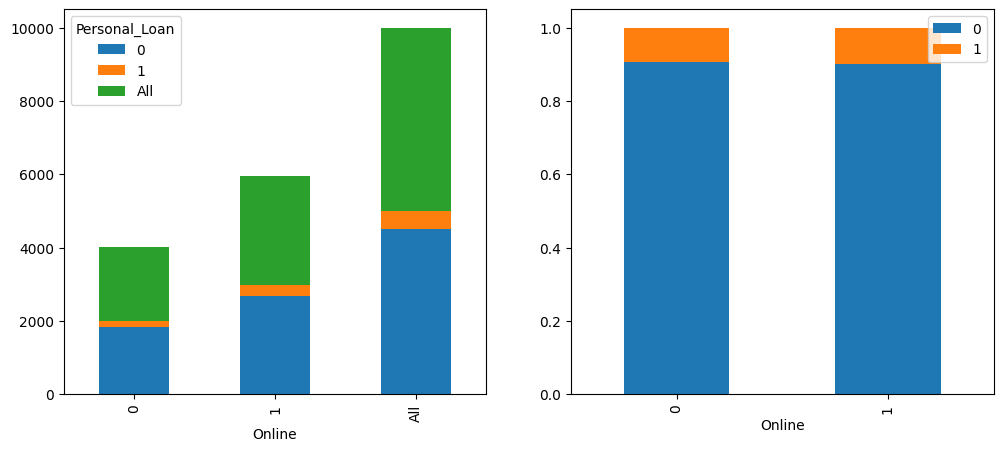

In [109]:
cat_vs_response_plot(data, 'Online', 'Personal_Loan')

#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000


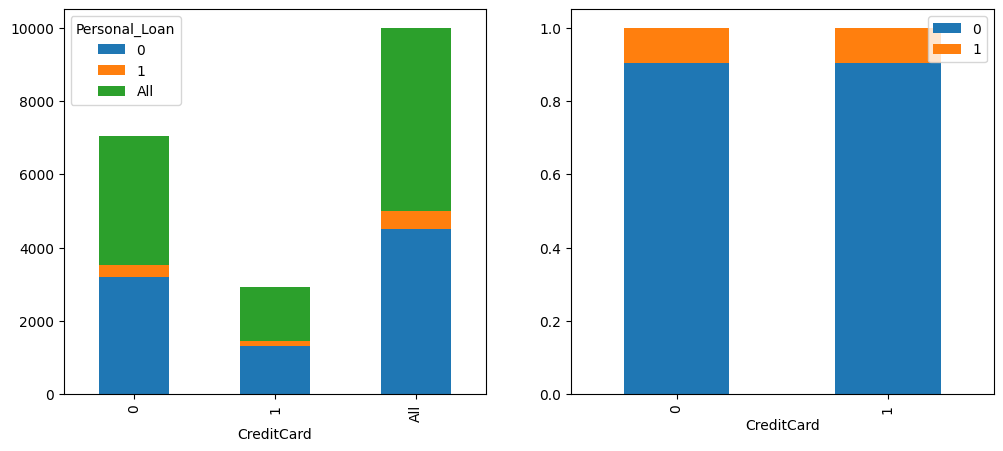

In [110]:
cat_vs_response_plot(data, 'CreditCard', 'Personal_Loan') 

#### Personal_Loan vs ZIPCode

Personal_Loan    0   1  All
ZIPCode                    
90095           63   8   71
91320           51   2   53
91711           48   4   52
92037           49   5   54
93106           53   4   57
93943           50   4   54
94025           48   4   52
94305          114  13  127
94720          150  19  169
95616          110   6  116
All            736  69  805


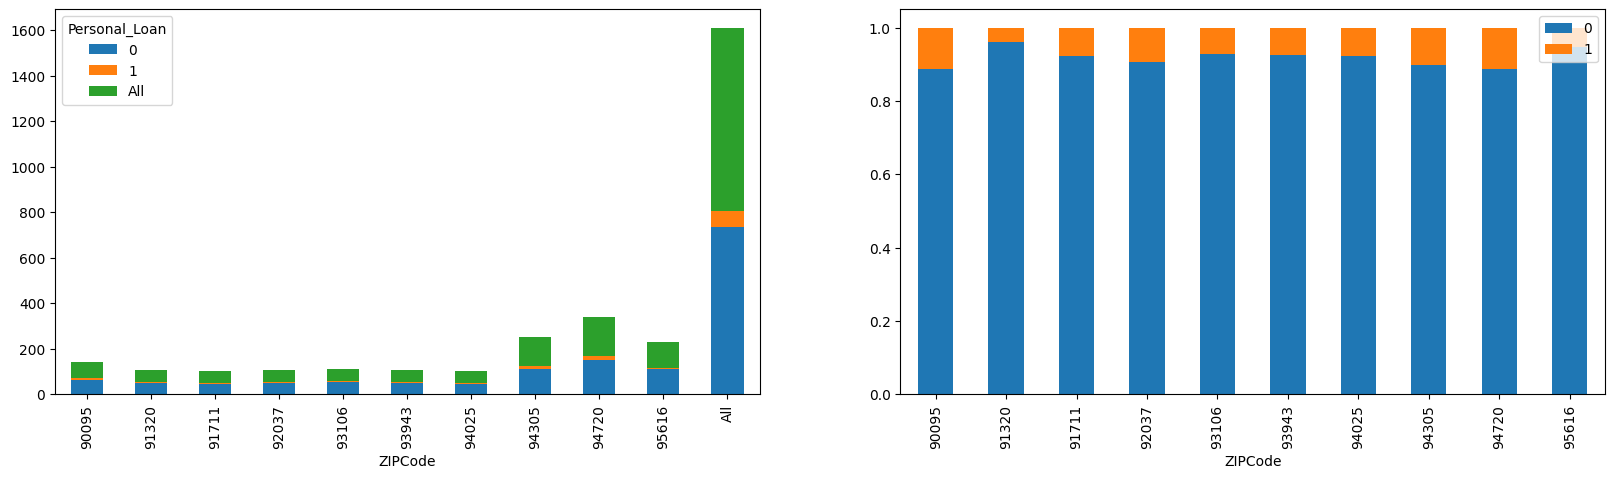

In [111]:
top_10_zips = data['ZIPCode'].value_counts().head(10).index
df_filtered = data[data['ZIPCode'].isin(top_10_zips)]
cat_vs_response_plot(df_filtered, 'ZIPCode', 'Personal_Loan', figsize=(20, 5))

#### Let's check how a customer's interest in purchasing a loan varies with their age

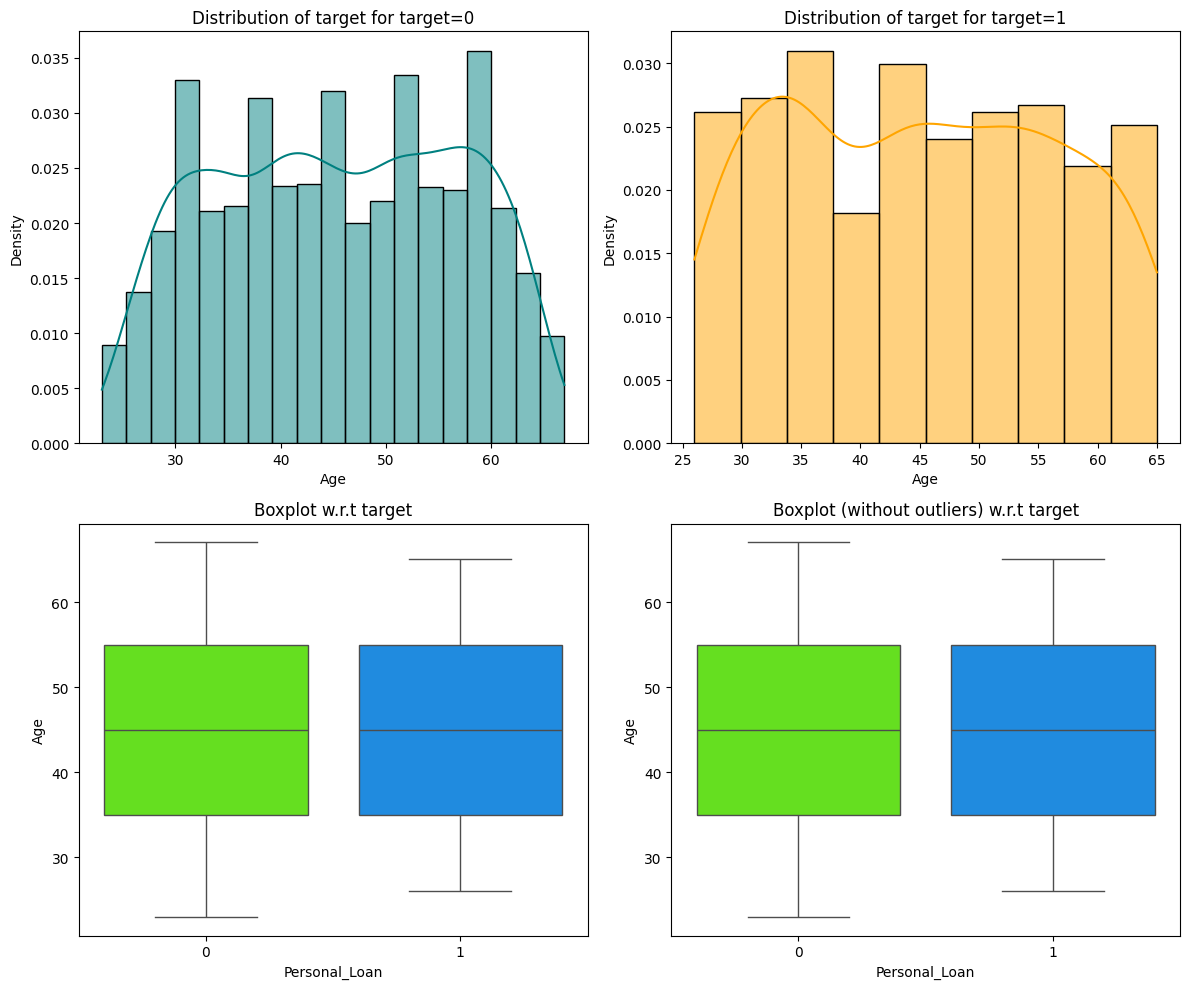

In [114]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

#### Personal Loan vs Experience

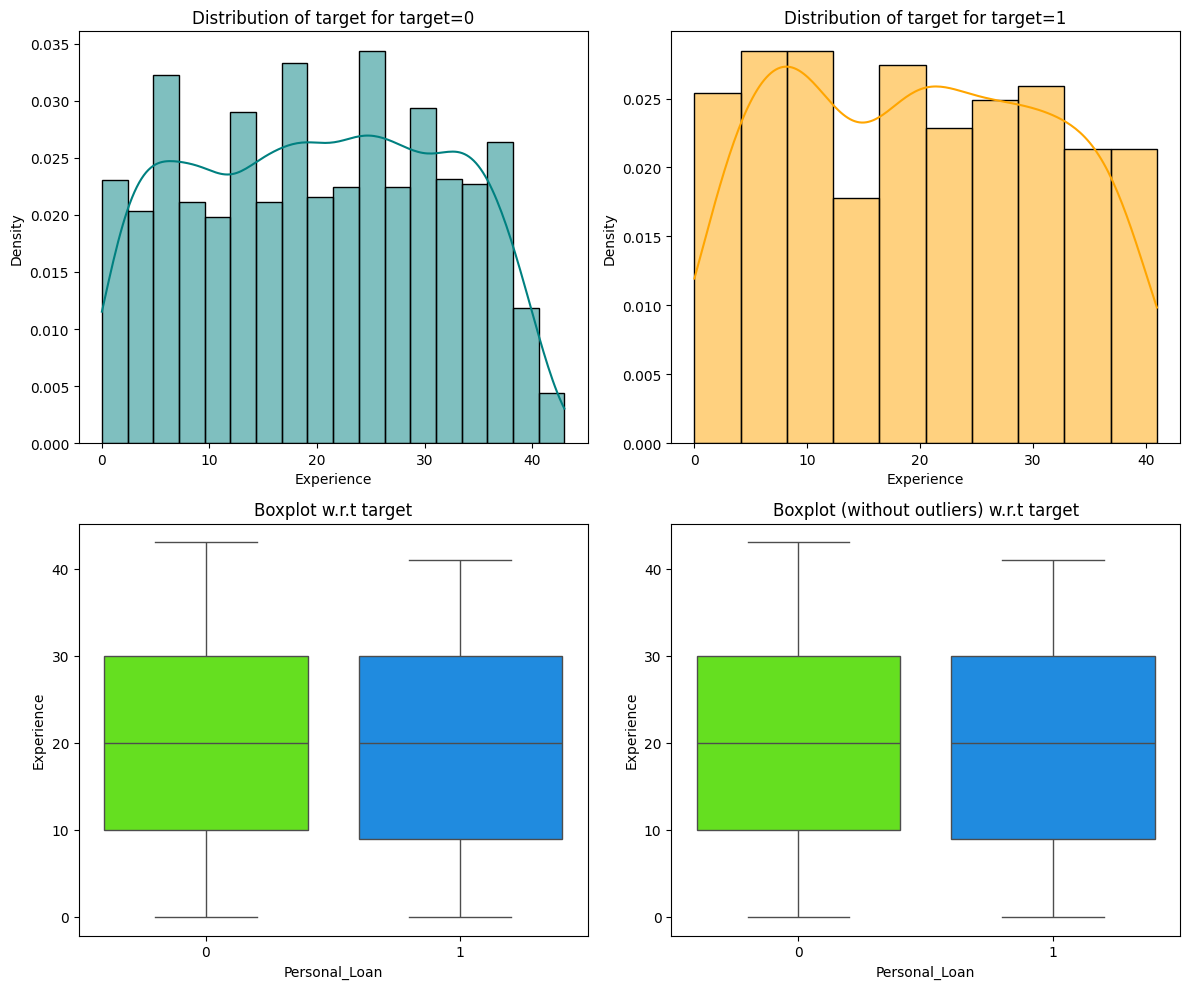

In [ ]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

#### Personal Loan vs Income

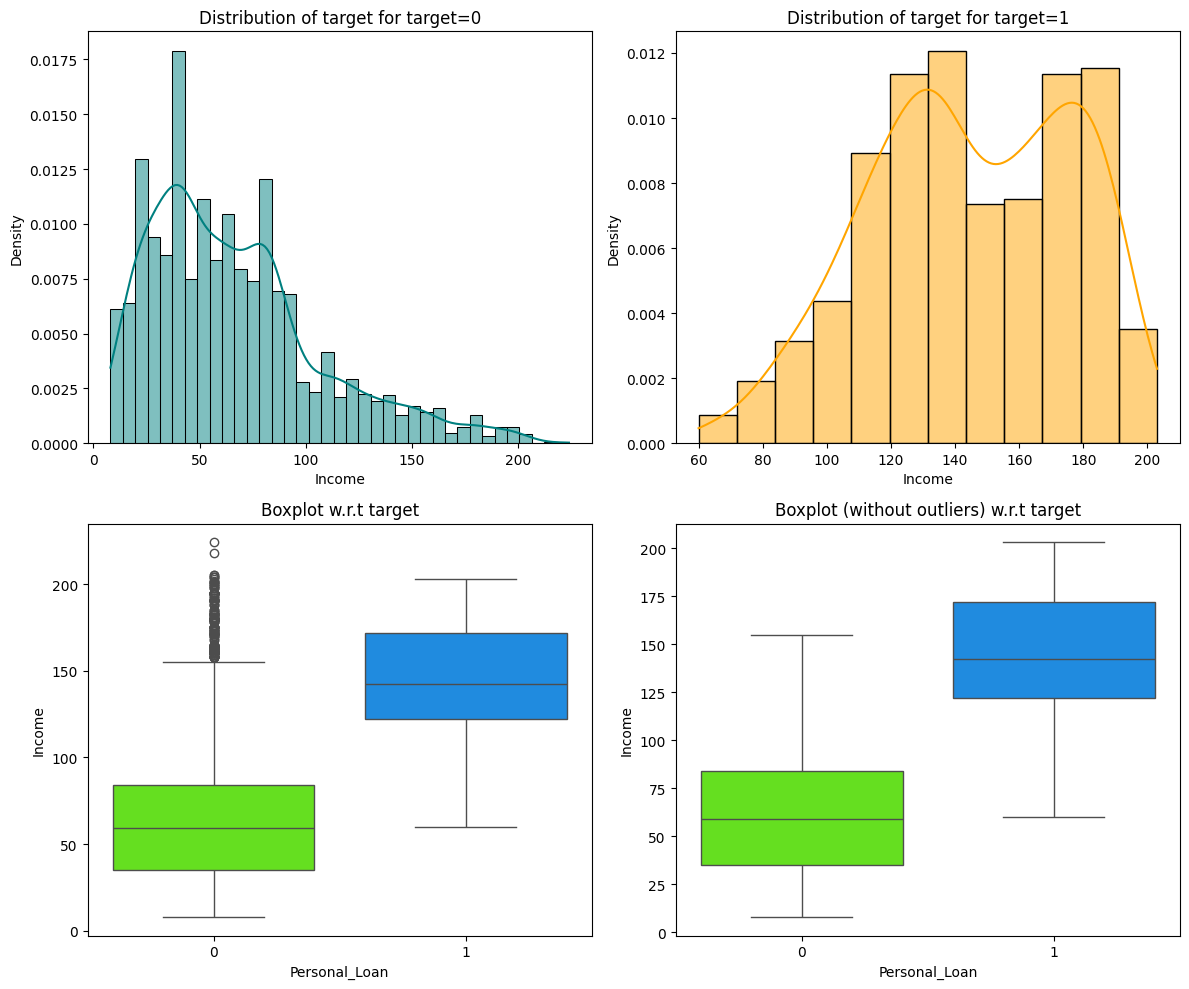

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

#### Personal Loan vs CCAvg

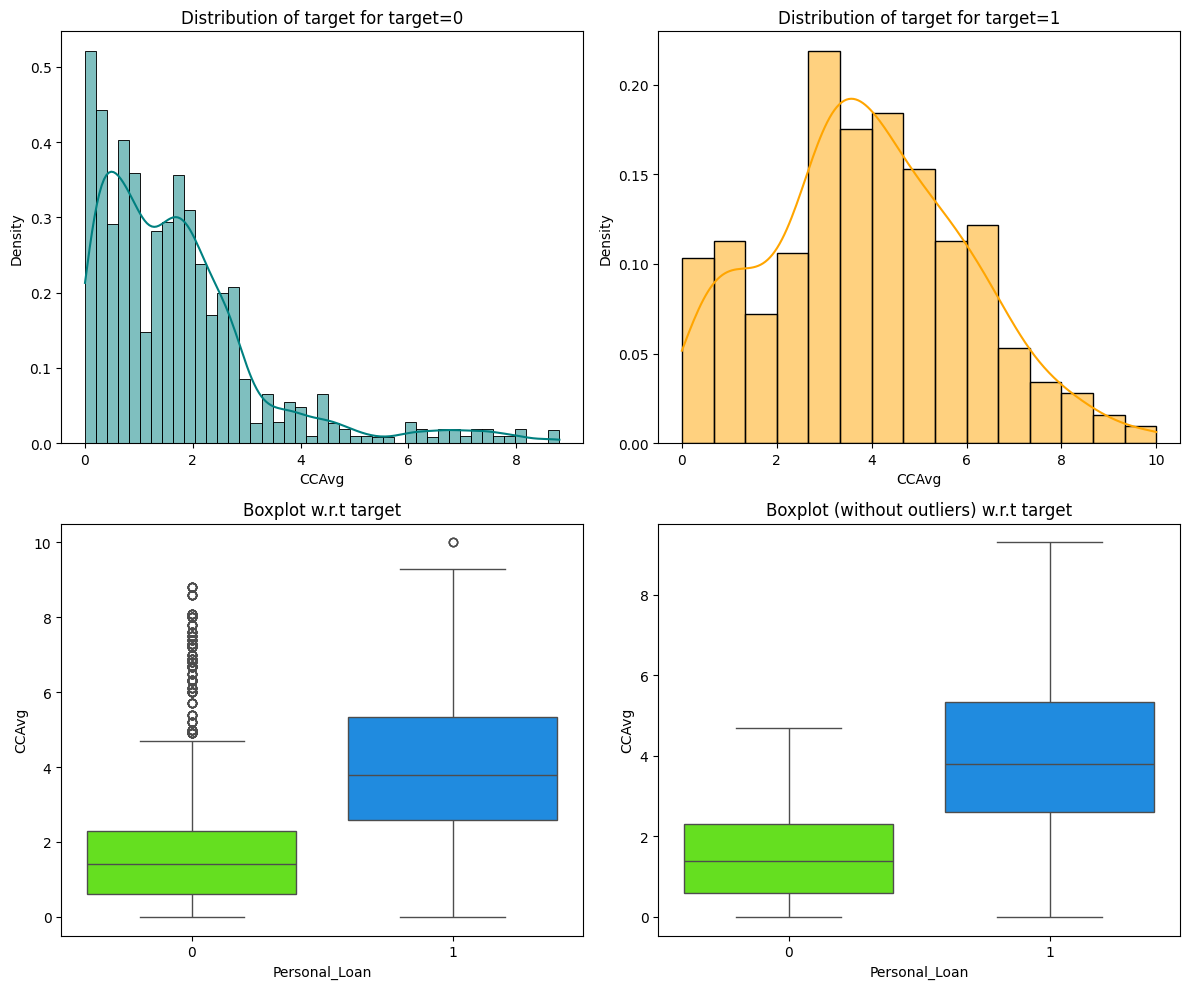

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

**Correlation**:
   - Age and experience almost completely correlated
   - Income and CCAvg spending are highly correlated
   - Some weak correlation exists between income and mortgage

**Response Variable against Categorical Variables**:

- Personal Loan vs Education:
    - Undergrads represent lowest possibility of loans
    - Graduates/advance education customers have more loans 

- Personal Loan vs Family:
    - Larger famlies seem to show good loan percentage wise

- Peronal Loan vs Securities Account, Online, Credit Card (for other banks):
    - No obvious relationship from the graphs

- Personal Loan vs Certificate of Deposit:
    - People with Certificate of Deposit account more likely to take out loans

- Personal Loan vs ZIPCode:
    - Also no apparent relationship. Only 3 zip code areas have more customers so more loans are coming from there, but no special relation of loan with ZIPCode itself.


**Response Variable against Numerical Variables**:

- Personal Loan vs Age: 
    - Younger groups (less than 40) seem to have more probability of going for loans.
    - Variance is less pronounced in people taking out personal loans, which suggests the same that younger people are likely to apply for personal loans.

- Personal Loan vs Experience:
    - Similar to distribution of Age

- Personal Loan vs Income:

    - From the plots, higher income customers appear to be more inclined to take out loans
    - Many outliers are present in non-loan takers (high income people not taking loans)
    - There are peaks (for Personal Loan applicants) at 130 and 175. After which there is a sharp decline
    - People who have high income and are not taking out loans seem to be a good target for marketing efforts

- Personal Loan vs CCAvg:
    - Heavily skwed, high spenders more likely to take out loans
    - There are outliers in people who are not applicants for personal loans
    - These outliers are also recommended for marketing efforts

### Other Observations

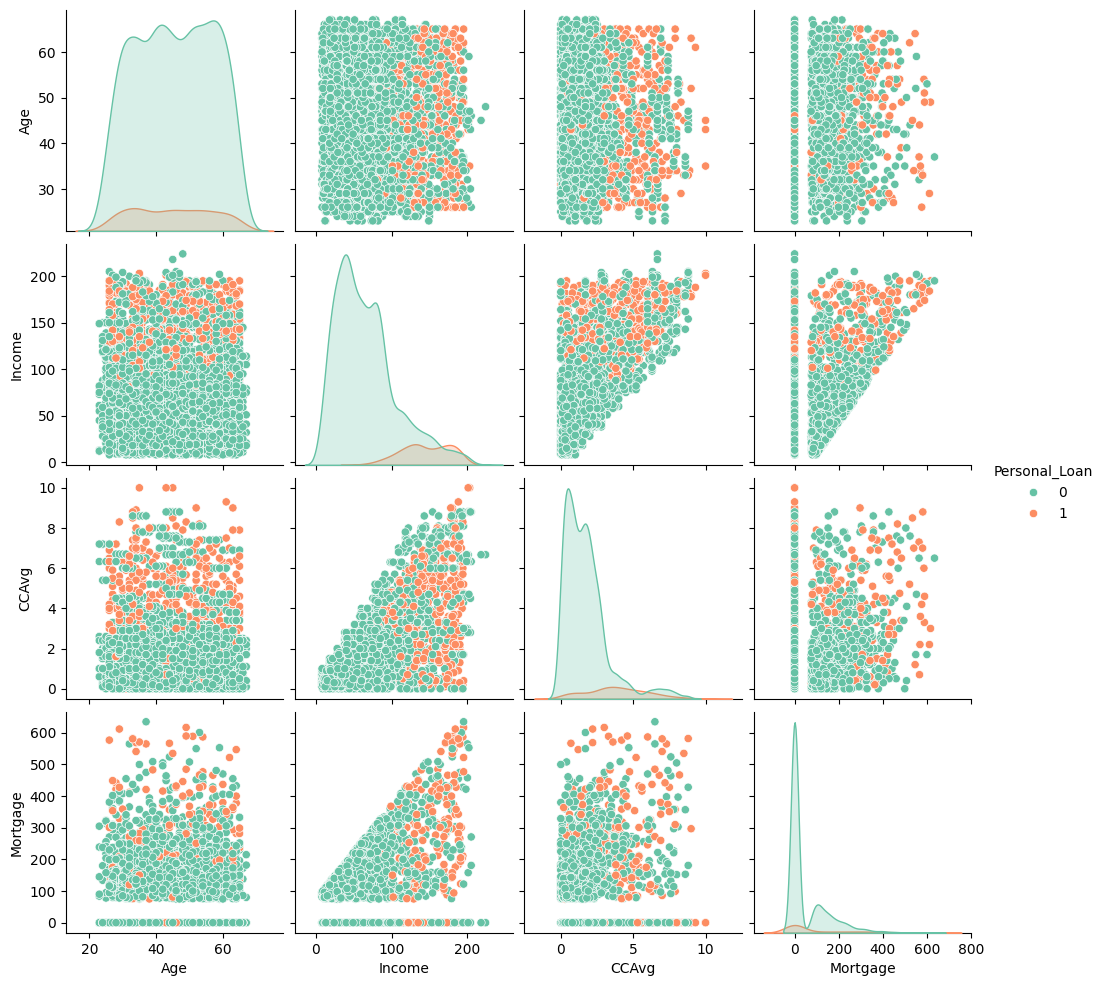

In [416]:
sns.pairplot(data, hue="Personal_Loan", vars=["Age", "Income", "CCAvg", "Mortgage"], palette="Set2");

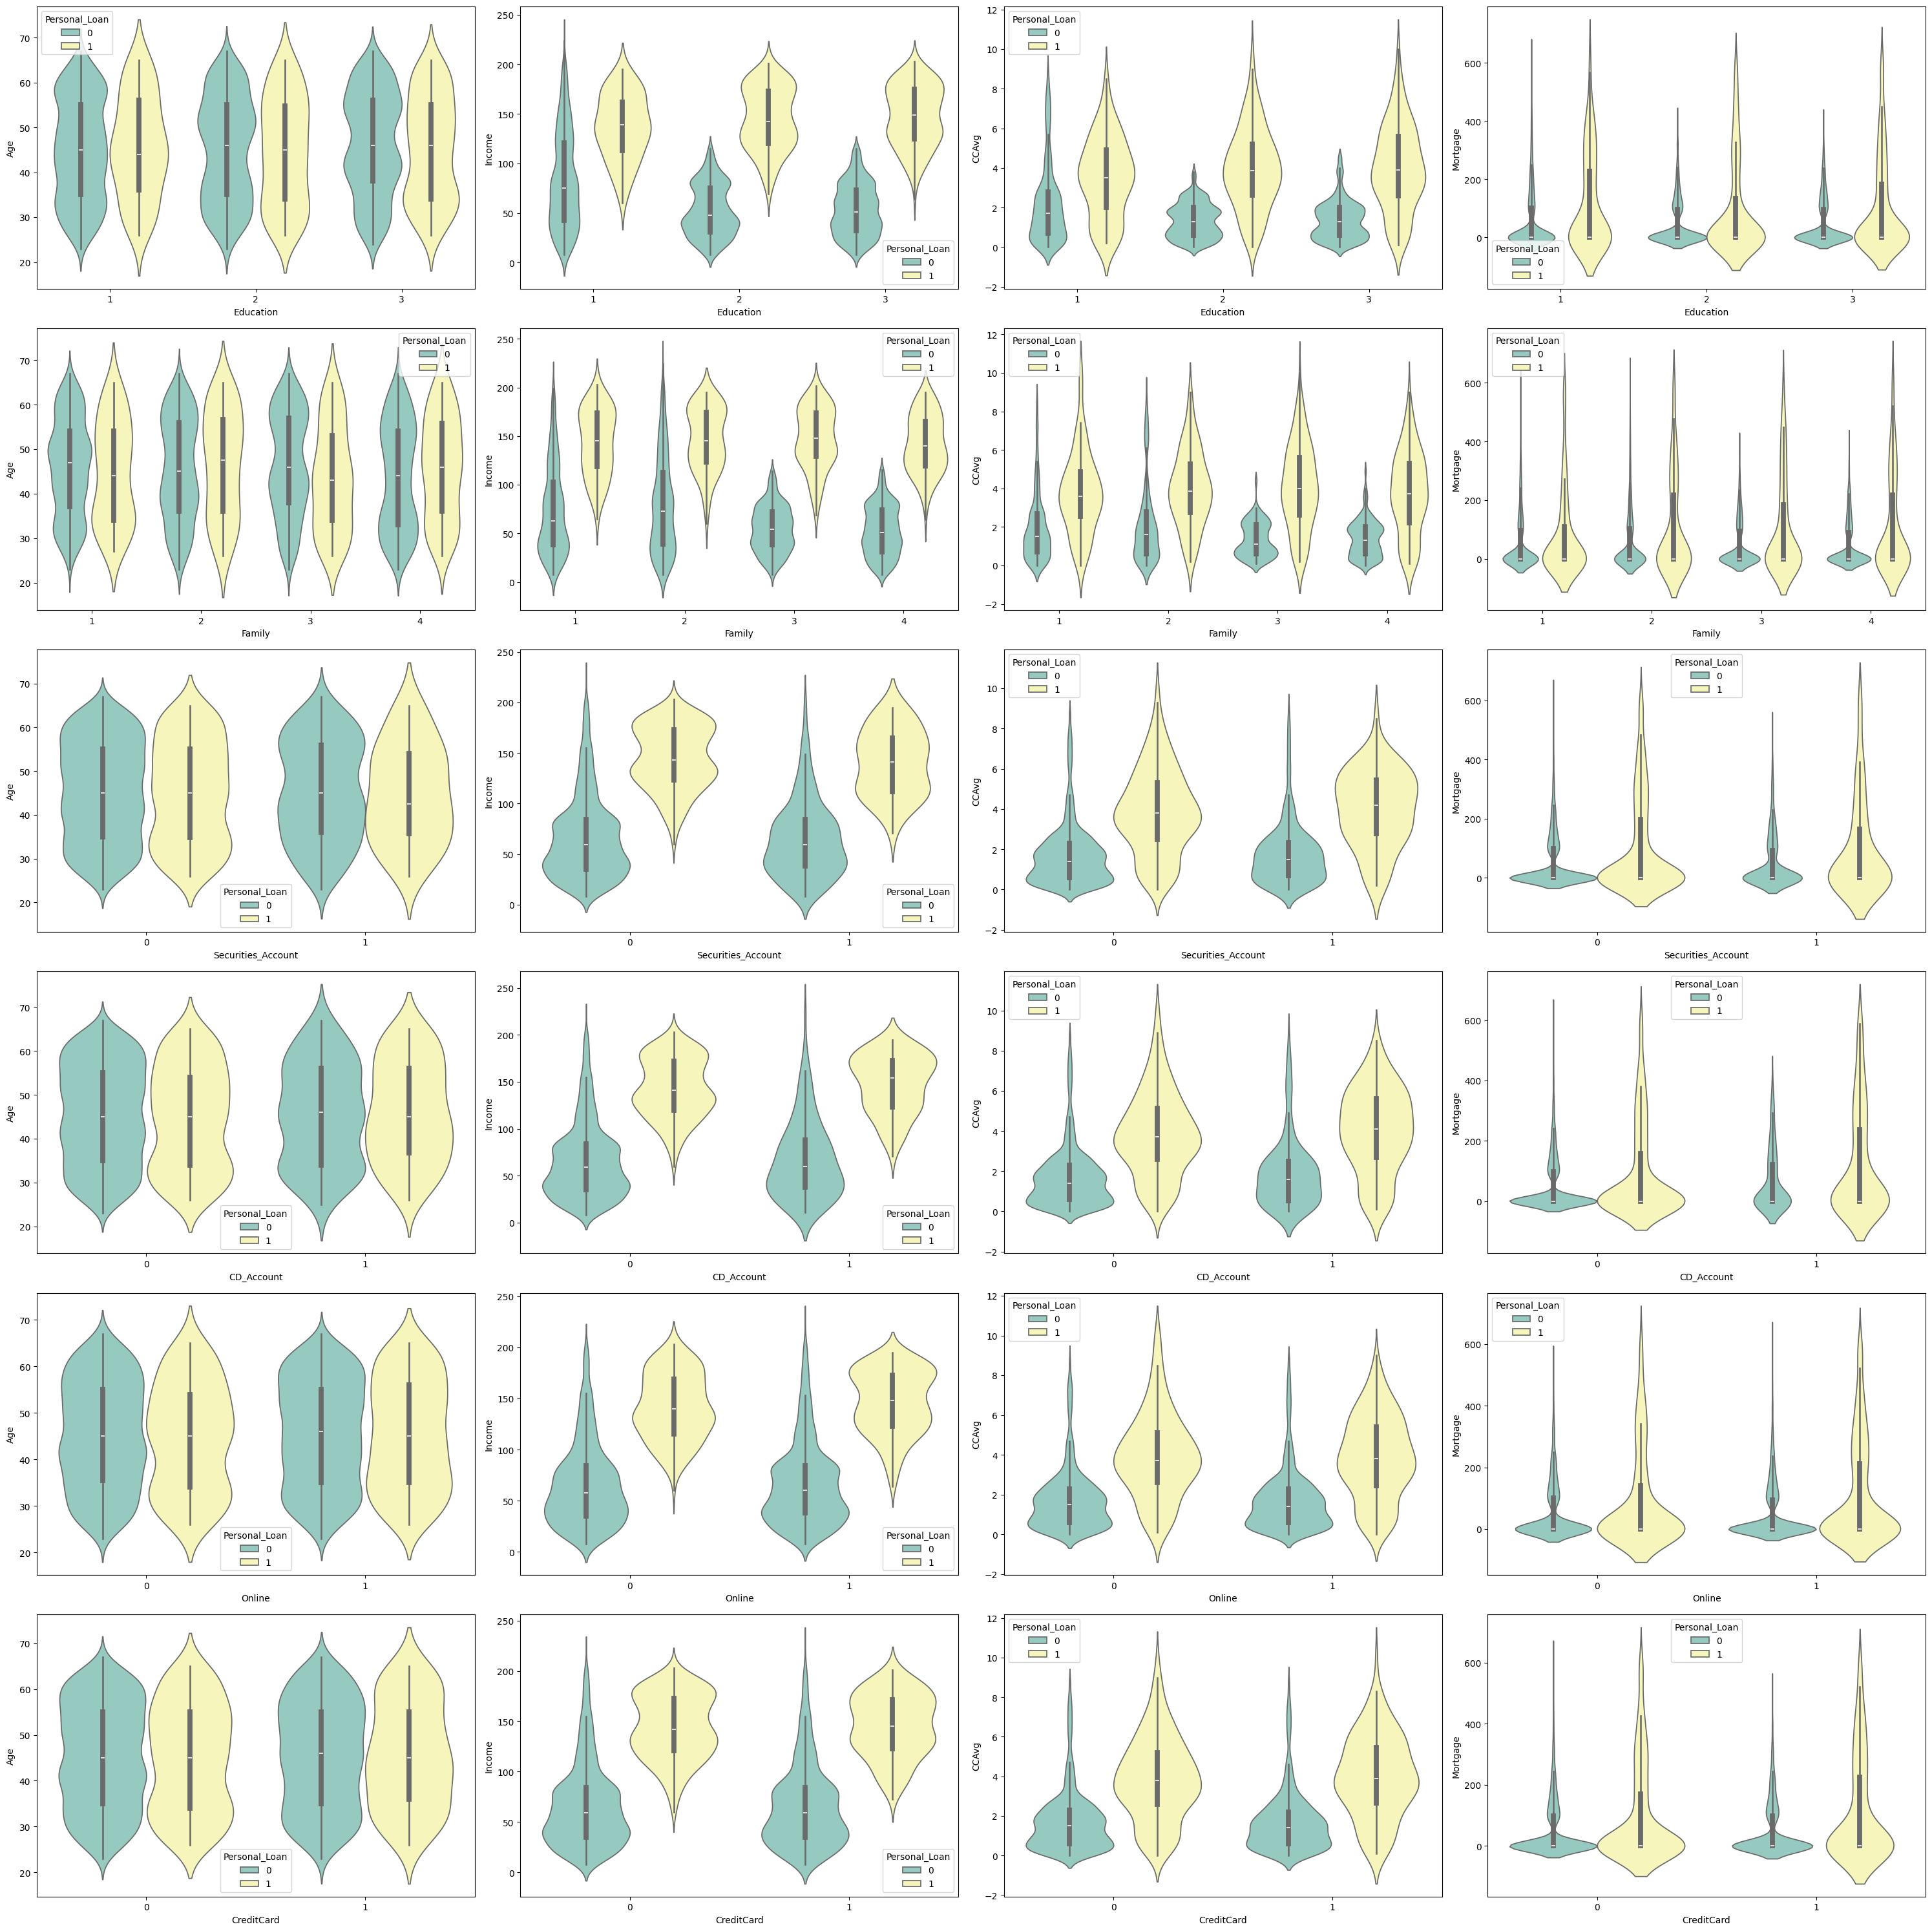

In [ ]:
numerical_columns = ['Age', 'Income', 'CCAvg', 'Mortgage']
categorical_columns = ['Education', 'Family', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(30, 30))

# 4. Loop and plot
for i, cat in enumerate(categorical_columns):
    for j, num in enumerate(numerical_columns):
        sns.violinplot(data=data, x=cat, y=num, hue='Personal_Loan', palette='Set3', ax=axes[i, j])
    

plt.tight_layout()
plt.show()

Other Observations:

- High income and high Credit Card spending are very likely to apply for loan across all categories
- Some observations on undergraduates/non-graduates
    - High income among them are mostly liability customers
    - High credit card spenders are also among liability customers
    - Some high mortgage customers are also liability customers
- Some observations on low family members (1-2):
    - High income are liability customers
    - High credit card spenders are also among liability customers
    - Some high mortgage customers  are also liability customers 

## Model Building

### Model Evaluation Criterion

**Algorithm Selection**
- The business objective indicate that the problem under discussion is a **classification** problem, as in we will have data of customers and the requirement is to predict whether a liability customer will proceed to take out personal loans or not. 
- So we have two classes: Yes/No or 1/0 and we have to predict where each observation/customer with various features will belong to
- This is not a regression problem as we are not predicting a continuous value. This is also not an unsupervised learning problem where we need some segmentation to understand different groups using something like clustering (so far).
- The appropriate model for prediction of classes seems to be Decision Trees 

**Model Evaluation**
- The objective is to maximize revenue by converting liability customers to asset customers via Personal Loan applications. There are a few inferences from this:
    - Having customers convert to Personal Loan applicants is highly important from revenue point of view. Losing a potential customer because they were not targeted by marketing efforts is assumed to be very costly 
    - The business will end up spending efforts to reach out potential applicants and offer them incentives for conversion. This will require expense but this expense is not comparable to the previous point: marketing/conversion expense on one potential customer who didn't convert is not nearly as heavy as the loss of a potential customer who was able to convert but was not reached out.

- Based on the above points, we will create different models which will be evaluated on the following criteria:
    - **Performance Metrics**
        - The model will be trained on training data and used for prediction on test data. The model should be able to generalize well (not lose much performance between training and test sets)
        - **Recall** is most important, as it penalizes False Negatives (customers who could have converted but were incorrectly predicted by model as not probable for conversion). Low Recall represents potential asset customers that were lost resulting in lost revenue. Recall needs to be very high (considering percentage of conversion w.r.t overall data is at 9%)
        - **Precision** is the parameter that will penalize False Positives (customers that were predicted to be good candidates for conversion by the model but in actual they weren't). This represents marketing efforts and costs that will be wasted. Precision needs to be moderately high (but this is not the primary metric for us to judge by)
        - **F1-Score** is the parameter that is a combination of both Recall and Precision. Essentially if we have a high Recall and a comparably high F1-Score it is good enough for the purposes of our model selection
    - **Complexity**
        - **Model Depth** the depth of the tree should not be very large. Given two models with same performance metrics, the one with less depth will be preferred
        - **Maximum number of leaf nodes** the number of nodes and number of leaf nodes should not be very high. Given two models with similar performance metrics, the one will lesser number of maximum nodes will be preferred.
        - Reduced Complexity will help in better visualization and interpretation of the model and its key drivers 


Following functions have been created to calculate different metrics and confusion matrixto avoid repitition for each model:

* The *classification_performance_metrics* function will be used to check the model performance of models.
* The *classification_confusion_matrix* function will be used to plot confusion matrix.
* *model_complexity* function will be used to check the complexity of the model

In [122]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def classification_performance_metrics(model, predictors, target):
    """
    give accuracy, recall, precision and f1-score for a classification model

    model: classifier - decision trees
    predictors: independent/input variables
    target: dependent/output/response variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    performance_metrics = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0])

    return performance_metrics

In [123]:
def classification_confusion_matrix(model, predictors, target):
    """
    Gives confusion_matrix

    model: classifier - decision trees
    predictors: independent/input variables
    target: dependent/output/response variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]for item in cm.flatten()]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [314]:
def model_complexity(trained_model):
    """
    Function to get the model complexity parameters
    trained_model: decision tree classifier model
    """

    depth = trained_model.get_depth()  # depth of the tree
    n_leaves = trained_model.get_n_leaves()  # number of leaves in the tree
    node_count = trained_model.tree_.node_count  # number of nodes in the tree

    model_complexity_df = pd.DataFrame({'Depth': depth, 'Number of leaves': n_leaves, 'Number of nodes': node_count}, index=[0])
    return model_complexity_df

### Decision Tree (default)

In this section, a decision tree will be built with default sklearn parameters 

In [124]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

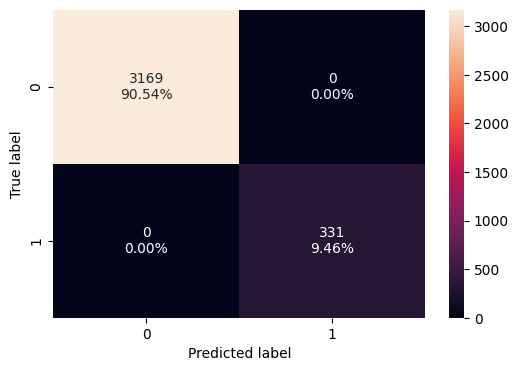

In [125]:
classification_confusion_matrix(model, X_train, y_train)

In [128]:
dtree1_perf_train = classification_performance_metrics(model, X_train, y_train)
dtree1_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [317]:
dtree1_complexity = model_complexity(model)
dtree1_complexity

Depth  Number of leaves  Number of nodes
0     15                43               85

#### Visualizing the Decision Tree

In [129]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_90007', 'ZIPCode_90009', 'ZIPCode_90011', 'ZIPCode_90016', 'ZIPCode_90018', 'ZIPCode_90019', 'ZIPCode_90024', 'ZIPCode_90025', 'ZIPCode_90027', 'ZIPCode_90028', 'ZIPCode_90029', 'ZIPCode_90032', 'ZIPCode_90033', 'ZIPCode_90034', 'ZIPCode_90035', 'ZIPCode_90036', 'ZIPCode_90037', 'ZIPCode_90041', 'ZIPCode_90044', 'ZIPCode_90045', 'ZIPCode_90048', 'ZIPCode_90049', 'ZIPCode_90057', 'ZIPCode_90058', 'ZIPCode_90059', 'ZIPCode_90064', 'ZIPCode_90065', 'ZIPCode_90066', 'ZIPCode_90068', 'ZIPCode_90071', 'ZIPCode_90073', 'ZIPCode_90086', 'ZIPCode_90089', 'ZIPCode_90095', 'ZIPCode_90210', 'ZIPCode_90212', 'ZIPCode_90230', 'ZIPCode_90232', 'ZIPCode_90245', 'ZIPCode_90250', 'ZIPCode_90254', 'ZIPCode_90266', 'ZIPCode_90272', 'ZIPCode_90274', 'ZIPCode_90275', 'ZIPCode_90277', 'ZIPCode_90280', 'ZIPCode_90291', 'ZIPCode_90304', 'ZIPCode_90401', 'ZIPCode_90404', 'ZIPCode_90405', 'ZIPCod

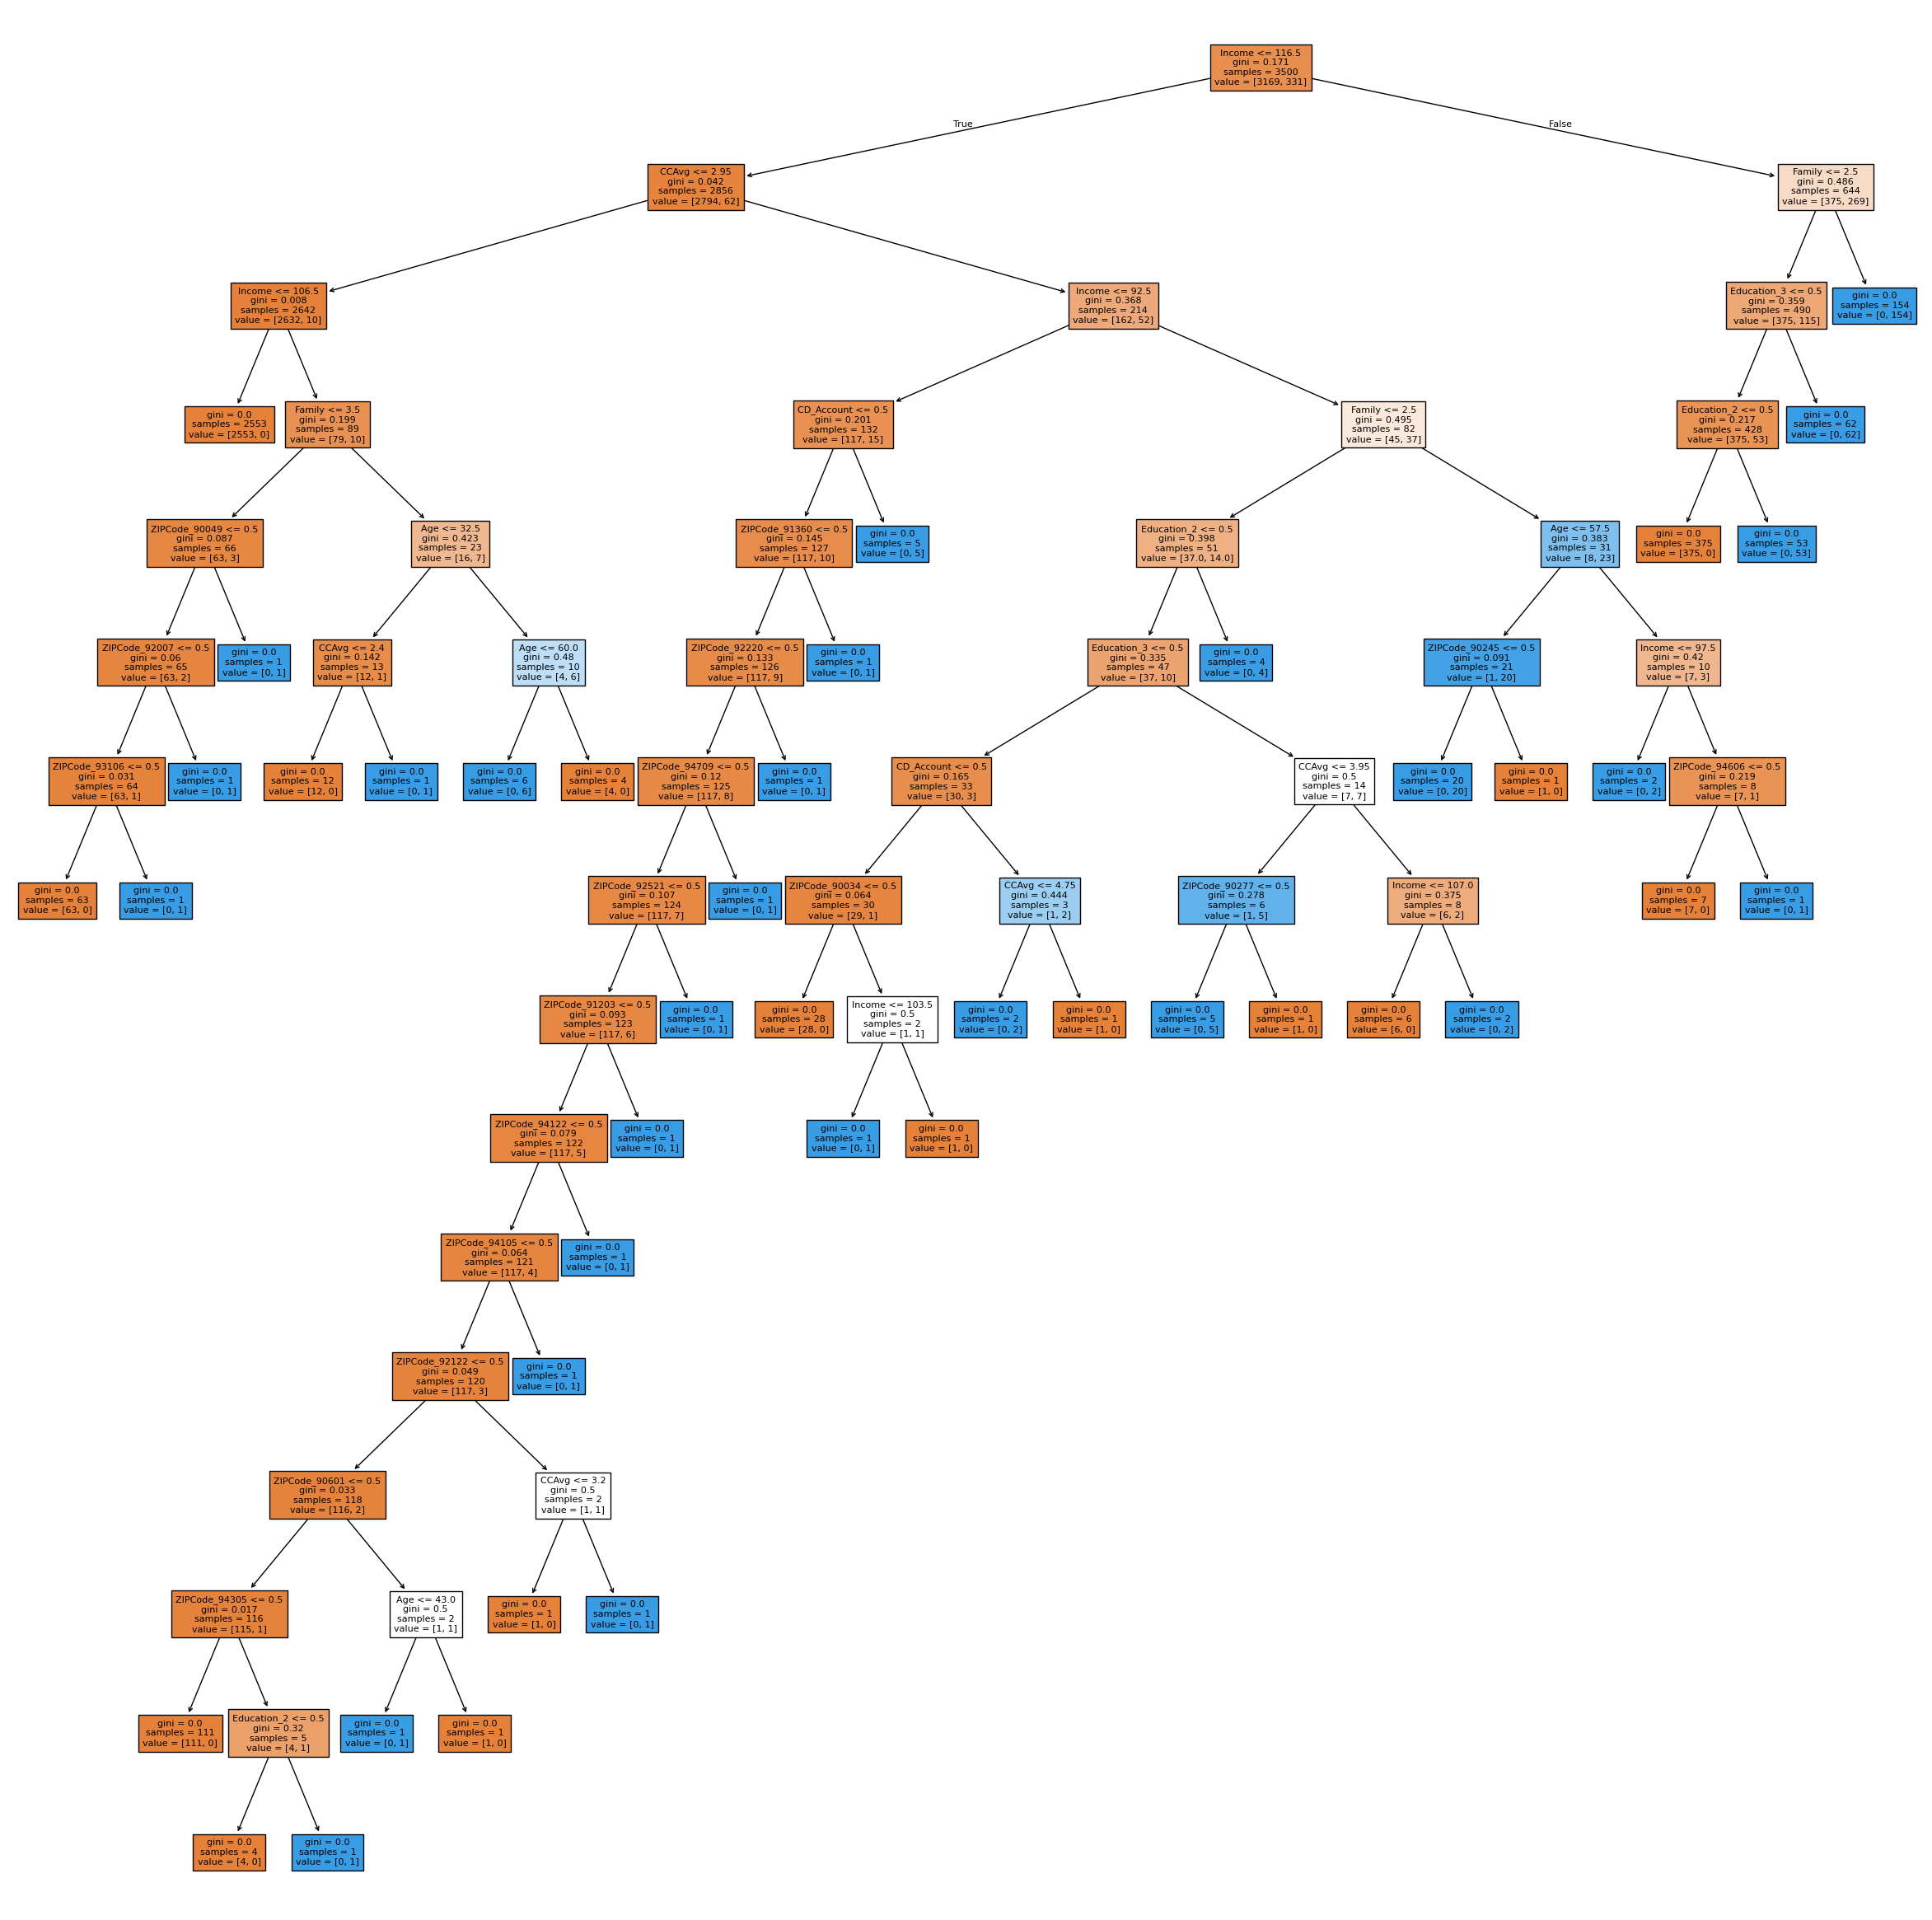

In [ ]:
plt.figure(figsize=(30, 30))
out = tree.plot_tree(model, feature_names=feature_names,filled=True,fontsize=8,node_ids=False,class_names=None)
plt.show()

Decision Rules:

In [137]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  2.40
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |---

#### Model Feature Importance

- model.feature_importances_ is an attribute that ranks how "important" or "useful" each feature was in making predictions.
How it works. It assigns a score to every input feature. The scores are typically non-negative and sum up to 1.0 (or 100%).
    - A high score means the feature was used frequently to split the data and significantly reduced the model's error (high "Gini importance" or "Gain").
    - A low score means the feature had little to no impact on the final prediction.


In [139]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

feature_importance = pd.DataFrame(
        model.feature_importances_, columns=["Importance"], index=X_train.columns).sort_values(by="Importance", ascending=False)

print(feature_importance)

               Importance
Income           0.308577
Family           0.246862
Education_2      0.165238
Education_3      0.144207
CCAvg            0.048662
...                   ...
ZIPCode_90036    0.000000
ZIPCode_90037    0.000000
ZIPCode_90041    0.000000
ZIPCode_90044    0.000000
ZIPCode_95135    0.000000

[477 rows x 1 columns]


There are a lot of values due to converting ZIPCode to one-hot encoding format, but almost all of these values don't contribute anything to prediction. Hence, going forward a feature importance threshold will be calculated for all models and only the important ones will be evaluated

In [143]:
filtered_features = feature_importance[feature_importance['Importance'] > 0.004]
print(filtered_features)

             Importance
Income         0.308577
Family         0.246862
Education_2    0.165238
Education_3    0.144207
CCAvg          0.048662
Age            0.024457
CD_Account     0.017273


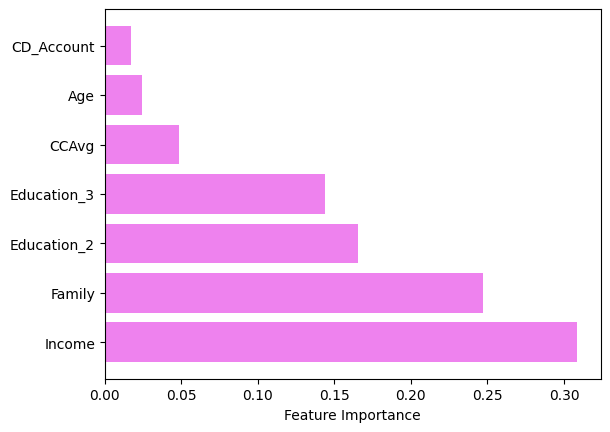

In [156]:
plt.barh(range(len(filtered_features)), filtered_features['Importance'], color="violet", align="center")
plt.yticks(range(len(filtered_features)), [filtered_features.index[i] for i in range(len(filtered_features))])
plt.xlabel("Feature Importance")
plt.show()

#### Checking model performance on test data

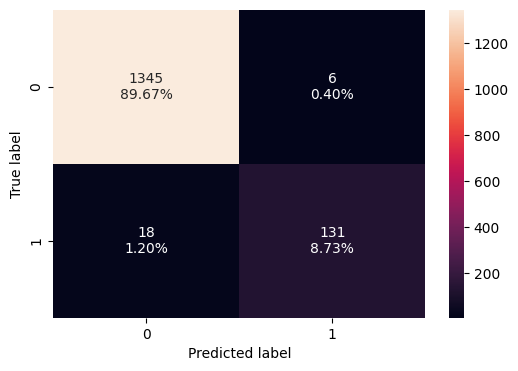

In [ ]:
classification_confusion_matrix(model, X_test, y_test)

In [ ]:
dtree1_perf_test = classification_performance_metrics(model, X_test, y_test)
dtree1_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.879195   0.956204  0.916084

## Model Performance Improvement

### Pre-Pruning

#### General Iteration

In [329]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 9, 1)
max_leaf_nodes_values = [50, 75, 100, 150]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator
            

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")



Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


##### Evaluating Pre-Pruned Tree (dtree2)

In [330]:
# Fit the best algorithm to the data.
dtree2 = best_estimator
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

**Checking performance on training data**

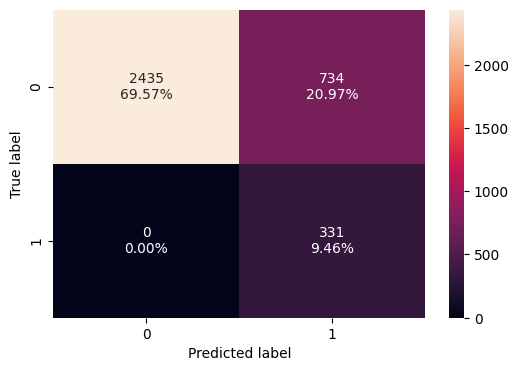

In [331]:
classification_confusion_matrix(dtree2, X_train, y_train)

In [332]:
dtree2_perf_train = classification_performance_metrics(dtree2, X_train, y_train)
dtree2_perf_train

Accuracy  Recall  Precision        F1
0  0.790286     1.0   0.310798  0.474212

In [333]:
dtree2_complexity = model_complexity(dtree2)
dtree2_complexity

Depth  Number of leaves  Number of nodes
0      2                 4                7

**Visualizing the Decision Tree**

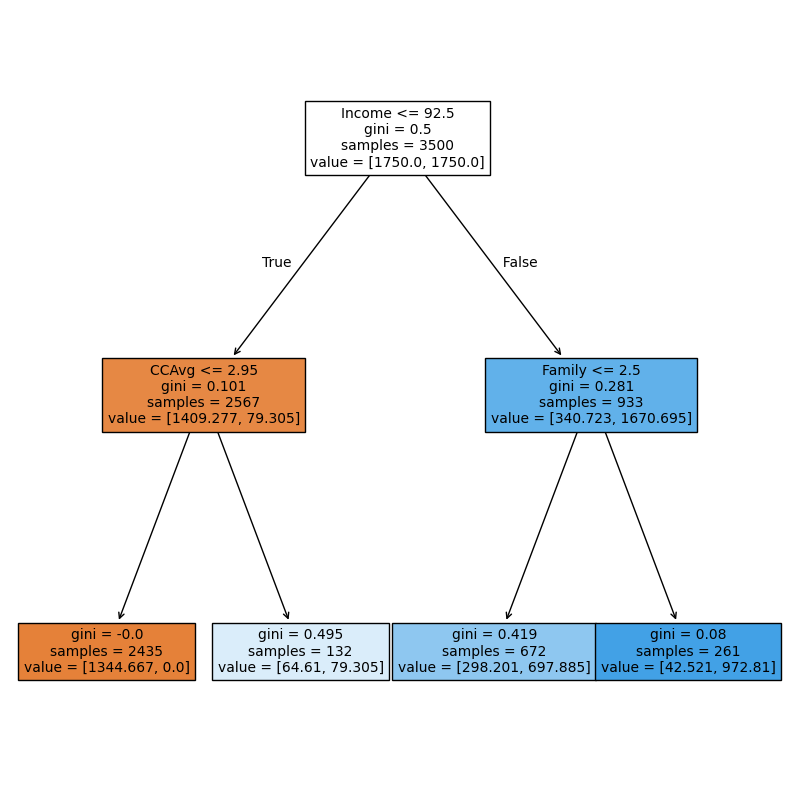

In [334]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    dtree2,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=False,
    class_names=None,
)

plt.show()

Decision Rules:

In [335]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



**Feature Importance**

In [336]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

dtree2_feature_importance = pd.DataFrame(
        dtree2.feature_importances_, columns=["Importance"], index=X_train.columns).sort_values(by="Importance", ascending=False)
filtered_dtree2_feature_importance = dtree2_feature_importance[dtree2_feature_importance['Importance'] > 0]
filtered_dtree2_feature_importance 

Importance
Income    0.876529
CCAvg     0.066940
Family    0.056531

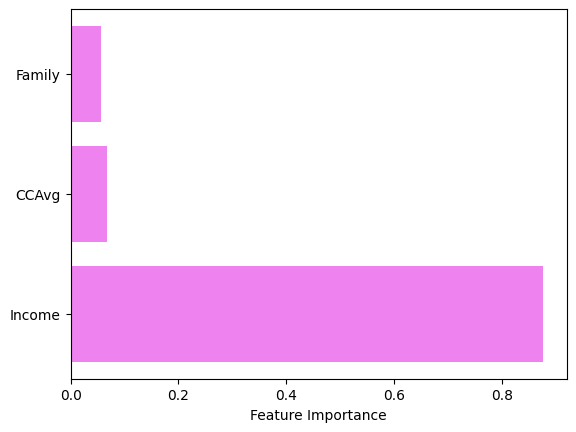

In [337]:
plt.barh(range(len(
filtered_dtree2_feature_importance )),
filtered_dtree2_feature_importance ['Importance'],
color="violet",
align="center"
)
plt.yticks(range(len(filtered_dtree2_feature_importance )),
[filtered_dtree2_feature_importance.index[i] for i in range(len(filtered_dtree2_feature_importance))]
)
plt.xlabel("Feature Importance")
plt.show()

**Checking performance on test data**

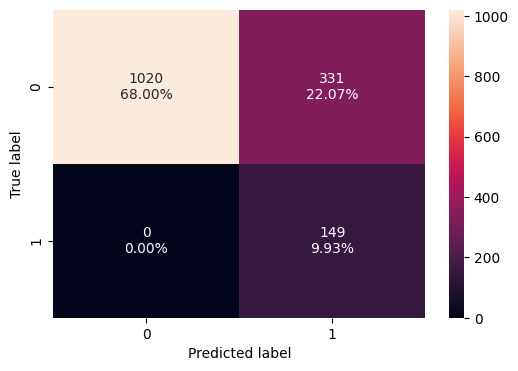

In [338]:
classification_confusion_matrix(dtree2, X_test, y_test)

In [ ]:
dtree2_perf_test = classification_performance_metrics(dtree2, X_test, y_test)
dtree2_perf_test

Accuracy  Recall  Precision        F1
0  0.779333     1.0   0.310417  0.473768

The precision score is very low. Although Recall is the ideal scenario (perfect prediction) we need to see if there are other options where precision doesn't have to be so low

#### Detailed Analysis of Pre-Pruned Tree Metrics

In [350]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 9, 1)
max_leaf_nodes_values = [50, 75, 100, 150]
min_samples_split_values = [10, 30, 50, 70]


model_statistics = []
estimator_list = []

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            estimator_list.append(estimator)
            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            model_statistics.append({
                'max_depth': max_depth,
                'max_leaf_nodes': max_leaf_nodes,
                'min_samples_split': min_samples_split,
                'Accuracy_train': accuracy_score(y_train, y_train_pred),
                'Accuracy_test': accuracy_score(y_test, y_test_pred),
                'Recall_train': recall_score(y_train, y_train_pred),
                'Recall_test': recall_score(y_test, y_test_pred),
                'Precision_train': precision_score(y_train, y_train_pred),
                'Precision_test': precision_score(y_test, y_test_pred),
                'F1_train': f1_score(y_train, y_train_pred),
                'F1_test': f1_score(y_test, y_test_pred),
                'Acc_diff': abs(accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred)),
                'Recall_diff': abs(recall_score(y_train, y_train_pred) - recall_score(y_test, y_test_pred)),
                'Precision_diff': abs(precision_score(y_train, y_train_pred) - precision_score(y_test, y_test_pred)),
                'F1_diff': abs(f1_score(y_train, y_train_pred) - f1_score(y_test, y_test_pred)),
        })

model_statistics_df = pd.DataFrame(model_statistics)

In [351]:
model_statistics_df.describe().T

count       mean        std        min        25%  \
max_depth          112.0   5.000000   2.008989   2.000000   3.000000   
max_leaf_nodes     112.0  93.750000  37.141681  50.000000  68.750000   
min_samples_split  112.0  40.000000  22.461178  10.000000  25.000000   
Accuracy_train     112.0   0.921184   0.074288   0.790286   0.820857   
Accuracy_test      112.0   0.910714   0.076836   0.779333   0.801333   
Recall_train       112.0   0.985757   0.010938   0.969789   0.972810   
Recall_test        112.0   0.953260   0.021355   0.932886   0.939597   
Precision_train    112.0   0.630464   0.198343   0.310798   0.342217   
Precision_test     112.0   0.610155   0.186984   0.310417   0.327945   
F1_train           112.0   0.748975   0.167556   0.474212   0.505910   
F1_test            112.0   0.723532   0.155053   0.473768   0.487973   
Acc_diff           112.0   0.010469   0.005252   0.001143   0.008667   
Recall_diff        112.0   0.032498   0.020981   0.000000   0.013078   
Precision_diff     112.0   0.022900   0.018478   0.000381   0.009068   
F1_diff            112.0   0.025911   0.019627   0.000444   0.001639   

                         50%         75%         max  
max_depth           5.000000    7.000000    8.000000  
max_leaf_nodes     87.500000  112.500000  150.000000  
min_samples_split  40.000000   55.000000   70.000000  
Accuracy_train      0.963571    0.968000    0.986857  
Accuracy_test       0.954667    0.959333    0.973333  
Recall_train        0.984894    0.995468    1.000000  
Recall_test         0.942953    0.959732    1.000000  
Precision_train     0.726868    0.752887    0.877984  
Precision_test      0.703518    0.729770    0.818713  
F1_train            0.836434    0.853403    0.935028  
F1_test             0.805634    0.821114    0.875000  
Acc_diff            0.010000    0.012952    0.019524  
Recall_diff         0.045297    0.045885    0.061072  
Precision_diff      0.021057    0.024161    0.070970  
F1_diff             0.031300    0.032373    0.067065

In [352]:
model_statistics_df.loc[model_statistics_df['F1_diff'].idxmin()]

max_depth             2.000000
max_leaf_nodes       50.000000
min_samples_split    10.000000
Accuracy_train        0.790286
Accuracy_test         0.779333
Recall_train          1.000000
Recall_test           1.000000
Precision_train       0.310798
Precision_test        0.310417
F1_train              0.474212
F1_test               0.473768
Acc_diff              0.010952
Recall_diff           0.000000
Precision_diff        0.000381
F1_diff               0.000444
Name: 0, dtype: float64

<Axes: >

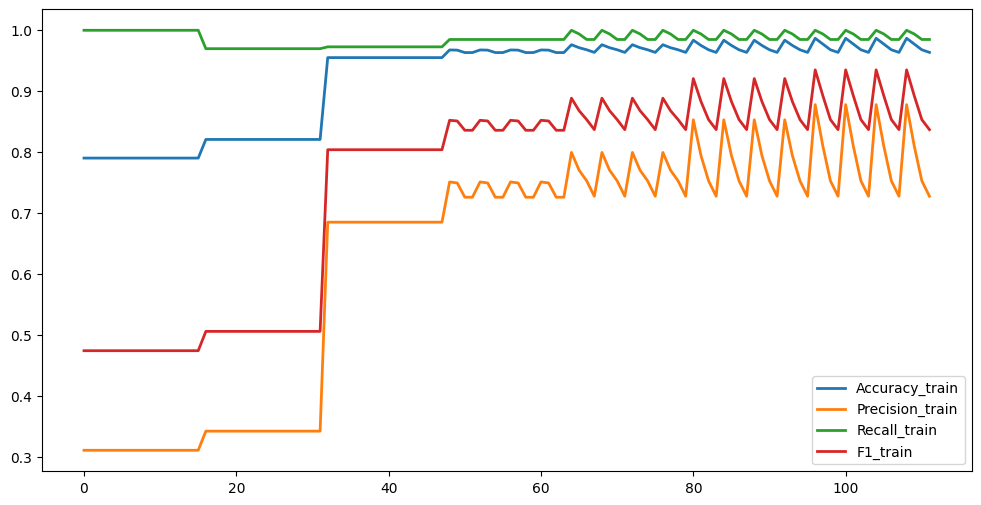

In [353]:
model_statistics_df[['Accuracy_train','Precision_train','Recall_train','F1_train']].plot(figsize=(12, 6), linewidth=2)

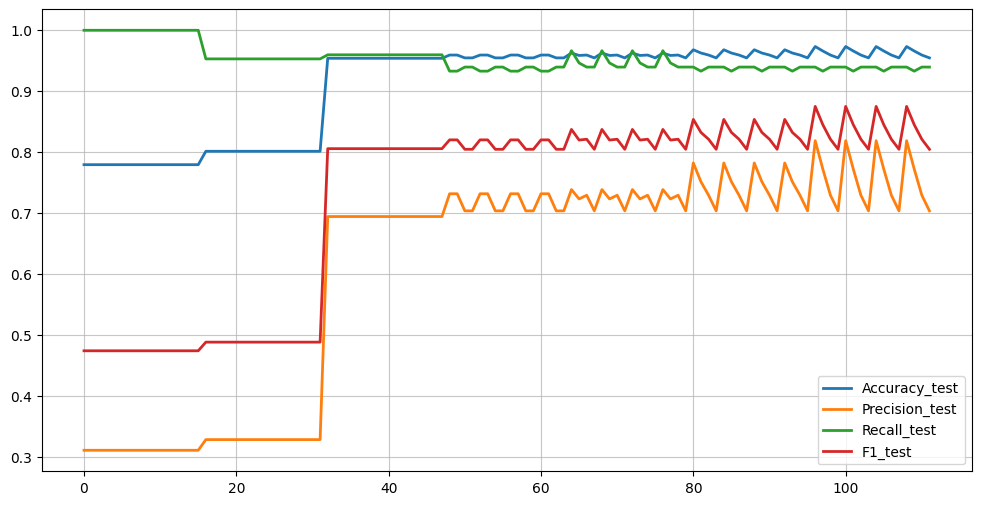

In [354]:
model_statistics_df[['Accuracy_test','Precision_test','Recall_test','F1_test']].plot(figsize=(12, 6), linewidth=2)
plt.grid(True, alpha=0.7)
plt.show()

we can see that max values of all occur when:

1. Precision > 0.7
2. Recall > 0.95
3. F1 Score > 0.8

Next, we shall attempt to find the tree that maximizes the above scores

In [355]:
model_statistics_df[(model_statistics_df['Recall_test']>0.95) & (model_statistics_df['F1_test']>0.8) & (model_statistics_df['Precision_test']>0.7)]

max_depth  max_leaf_nodes  min_samples_split  Accuracy_train  \
64          6              50                 10        0.976286   
68          6              75                 10        0.976286   
72          6             100                 10        0.976286   
76          6             150                 10        0.976286   

    Accuracy_test  Recall_train  Recall_test  Precision_train  Precision_test  \
64       0.962667           1.0     0.966443         0.799517        0.738462   
68       0.962667           1.0     0.966443         0.799517        0.738462   
72       0.962667           1.0     0.966443         0.799517        0.738462   
76       0.962667           1.0     0.966443         0.799517        0.738462   

    F1_train   F1_test  Acc_diff  Recall_diff  Precision_diff   F1_diff  
64  0.888591  0.837209  0.013619     0.033557        0.061055  0.051381  
68  0.888591  0.837209  0.013619     0.033557        0.061055  0.051381  
72  0.888591  0.837209  0.013619     0.033557        0.061055  0.051381  
76  0.888591  0.837209  0.013619     0.033557        0.061055  0.051381

Since all performance values mentioned above are equal, we will pick the tree with the least complexity

In [ ]:
#max_depth = 6
#max_leaf_nodes = 50
#min_samples_split = 10

##### Evaluating Pre-Pruned Tree (dtree3)

In [359]:
# selecting tree with max_depth 6, max_leaf nodes = 50
dtree3 = estimator_list[64]
dtree3.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(6),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

Checking on training data

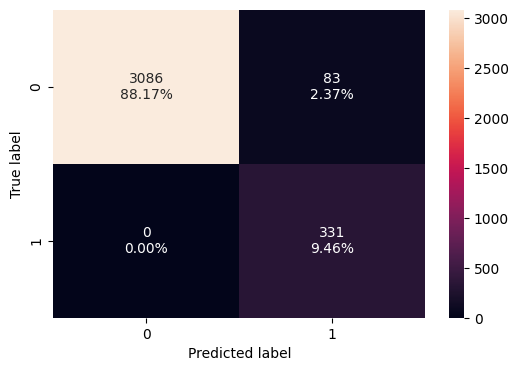

In [360]:
classification_confusion_matrix(dtree3, X_train, y_train)

In [361]:
dtree3_perf_train = classification_performance_metrics(dtree3, X_train, y_train)
dtree3_perf_train

Accuracy  Recall  Precision        F1
0  0.976286     1.0   0.799517  0.888591

In [362]:
dtree3_complexity = model_complexity(dtree3)
dtree3_complexity

Depth  Number of leaves  Number of nodes
0      6                27               53

Visualizing the Tree

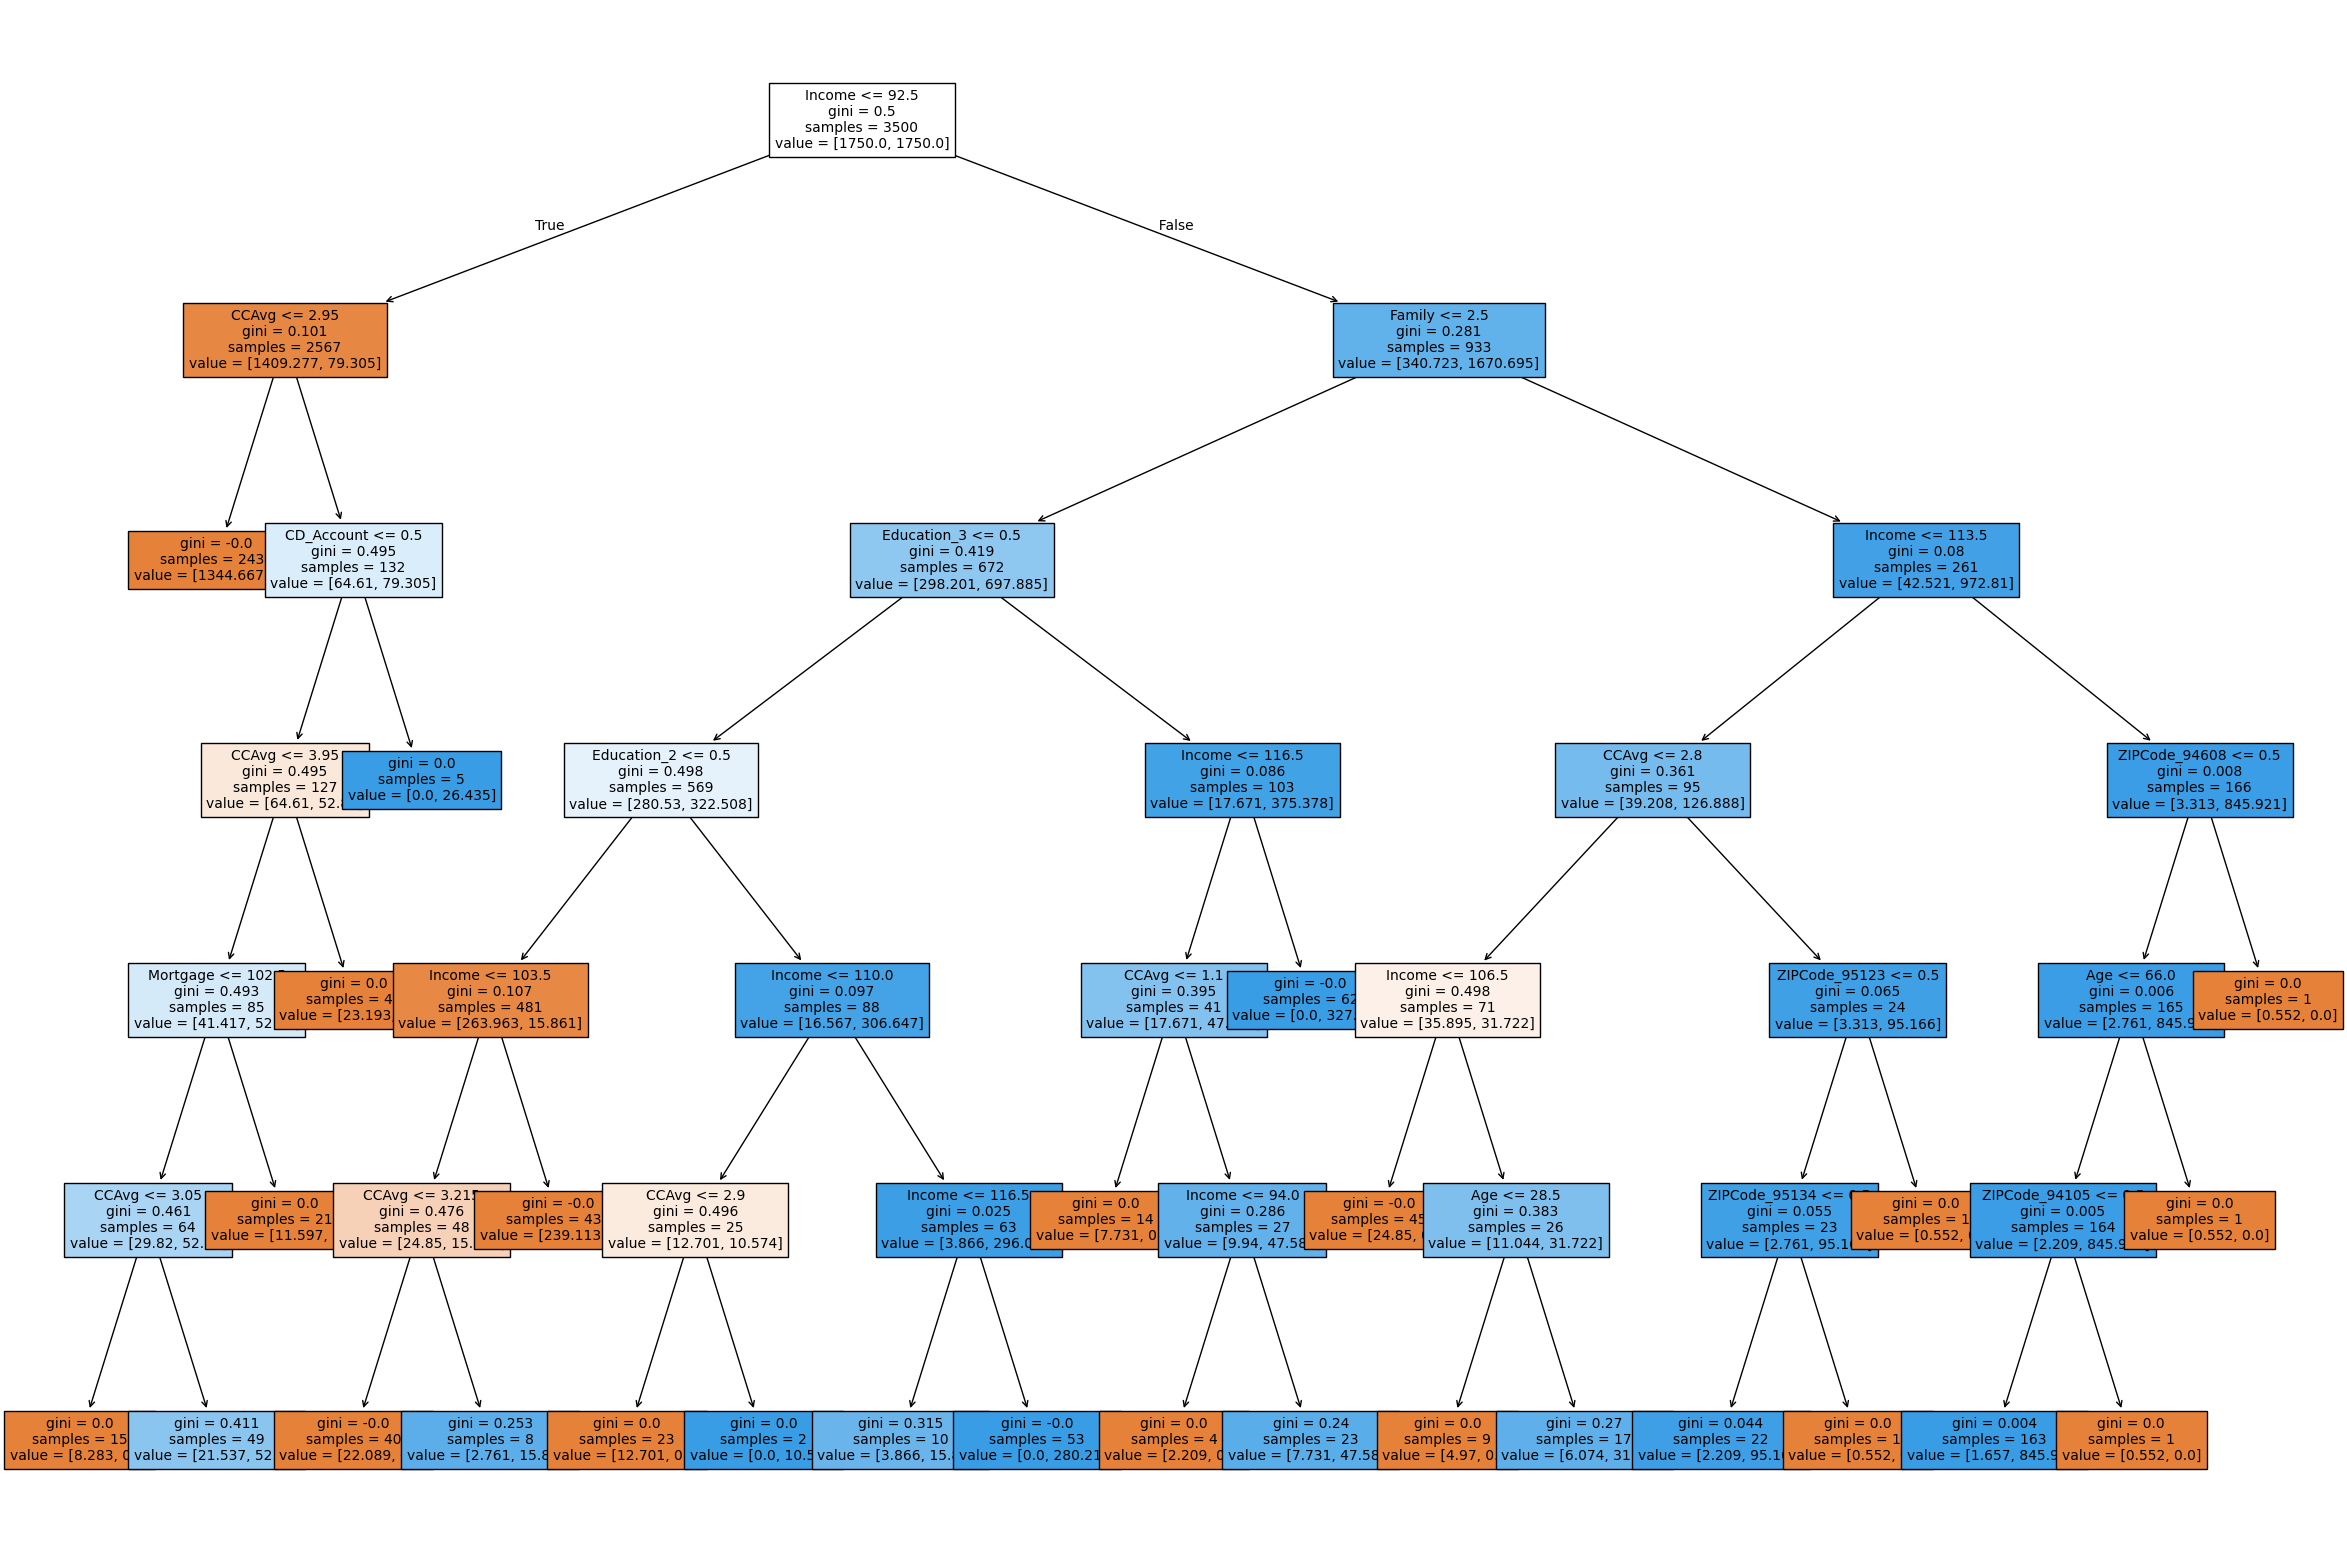

In [418]:
plt.figure(figsize=(30, 20))
out = tree.plot_tree(
    dtree3,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=False,
    class_names=None,)

plt.show()

Decision Rules:

In [365]:
print(tree.export_text(dtree3, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- weights: [21.54, 52.87] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [11.60, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- 

Feature Importance

In [367]:
dtree3_feature_importance = pd.DataFrame(
        dtree3.feature_importances_, columns=["Importance"], index=X_train.columns).sort_values(by="Importance", ascending=False)
filtered_dtree3_feature_importance = dtree3_feature_importance[dtree3_feature_importance['Importance'] > 0.003]
filtered_dtree3_feature_importance 

Importance
Income         0.656667
Education_2    0.142307
CCAvg          0.091533
Education_3    0.050106
Family         0.039750
CD_Account     0.007782
Mortgage       0.004957
Age            0.004344

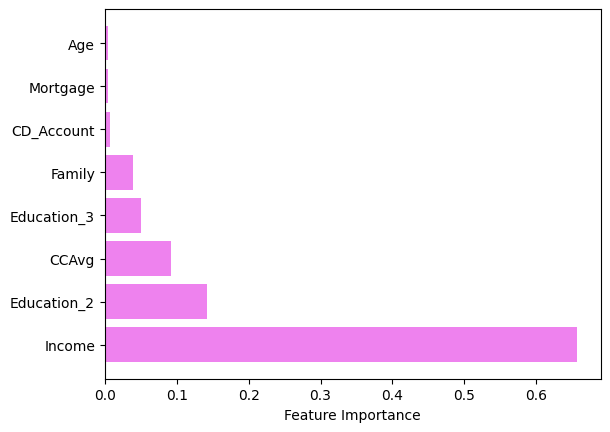

In [368]:

plt.barh(range(len(
filtered_dtree3_feature_importance )),
filtered_dtree3_feature_importance ['Importance'],
color="violet",
align="center"
)
plt.yticks(range(len(filtered_dtree3_feature_importance )),
[filtered_dtree3_feature_importance.index[i] for i in range(len(filtered_dtree3_feature_importance))]
)
plt.xlabel("Feature Importance")
plt.show()

Checking on Test Data

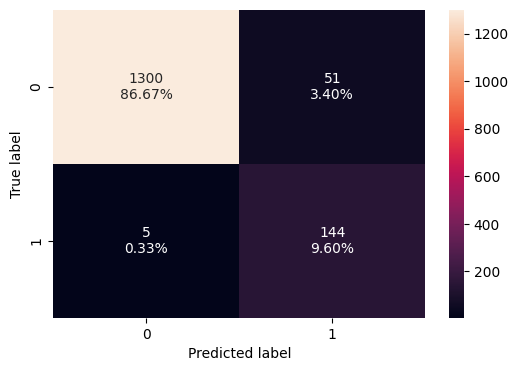

In [369]:
classification_confusion_matrix(dtree3, X_test, y_test)

In [ ]:
dtree3_perf_test = classification_performance_metrics(dtree3, X_test, y_test)
dtree3_perf_test

Accuracy    Recall  Precision        F1
0  0.962667  0.966443   0.738462  0.837209

### Post-pruning

The second method for pruning (post-pruning) shall be assessed in the following section. This involves growing the tree first fully and then pruning it according to the "cost-complexity" parameter or alpha. Cost-complexity considers increase in error and number of nodes (as complexity) for each pruned sub-tree and gives us a complete path of the most effective values of alpha for pruning the tree

In [ ]:
clf = DecisionTreeClassifier(random_state=1)                 # instantiating a new decision tree
path =  clf.cost_complexity_pruning_path(X_train, y_train)   # computing the cost complexity pruning path over the training data
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Without any threshold specified, pruning will continue until there is only one node (root node) left in the tree

In [193]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000276    0.000552
2     0.000279    0.002224
3     0.000381    0.002605
4     0.000476    0.003081
5     0.000500    0.003581
6     0.000513    0.007174
7     0.000527    0.007701
8     0.000544    0.008246
9     0.000545    0.009882
10    0.000625    0.010507
11    0.000700    0.011207
12    0.000762    0.012731
13    0.000882    0.016260
14    0.000940    0.017200
15    0.001305    0.018505
16    0.001647    0.020153
17    0.002333    0.022486
18    0.002407    0.024893
19    0.003294    0.028187
20    0.006473    0.034659
21    0.025146    0.084951
22    0.039216    0.124167
23    0.047088    0.171255

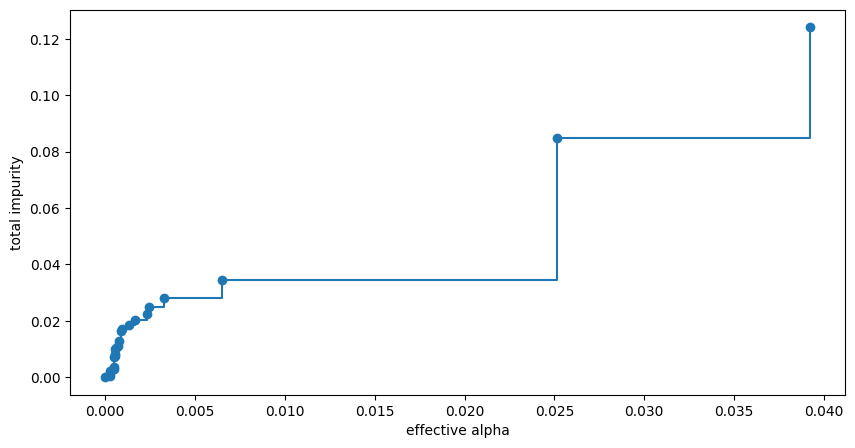

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")   # plotting effective alpha vs total impurity, leaving out the last value with a single node
ax.set_xlabel("effective alpha")                                                
ax.set_ylabel("total impurity")                                                 
plt.show()

In [274]:
clfs = []
for ccp_alpha in ccp_alphas:                                            # looping through all ccp_alpha values 
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)   # instantiating decision tree with each ccp_alpha value
    clf.fit(X_train, y_train)    
    clfs.append(clf)


# number of nodes in the last tree    
print(f"Root tree nodes, ccp_alpha: {clfs[-1].tree_.node_count}, {float(ccp_alphas[-1])}")
    

Root tree nodes, ccp_alpha: 1, 0.04708834100596766


- Following is a plot of alpha against:
    - Depth of the tree
    - Number of nodes in the tree

Number of nodes and depth are both elements we can look at to gauge the complexity of the tree. Increasing alpha values will indicate towards reducing complexity which means reduction in depth and number of nodes. We are looking for a balanced value where the resulting tree is not too complex, yet it does not lose too much of its prediction performance

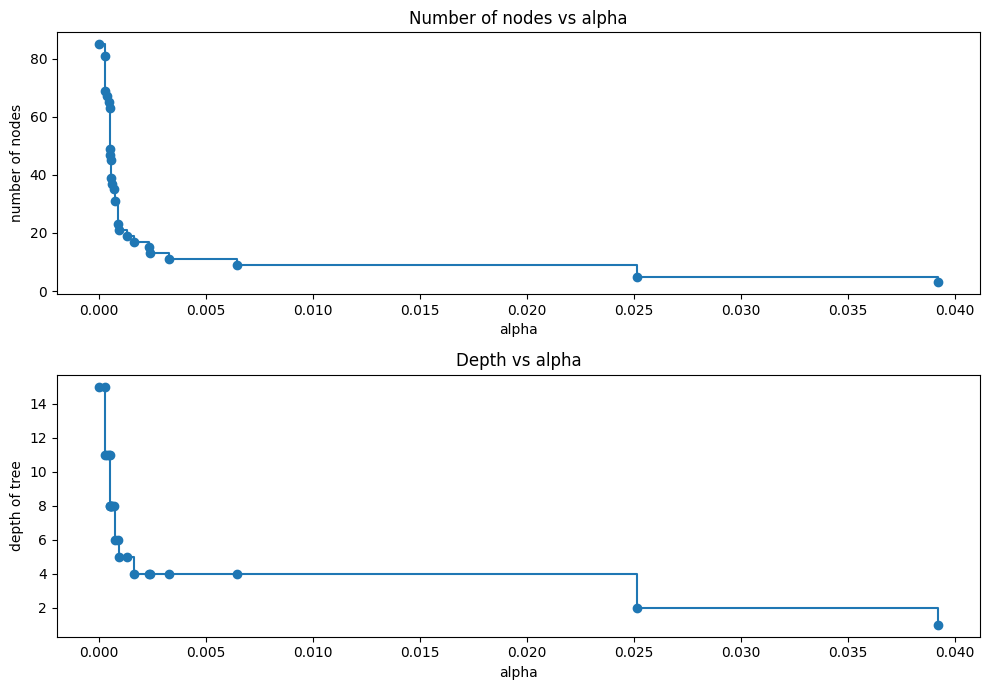

In [ ]:
clfs = clfs[:-1]                                                            # removing the last tree which is the trivial tree with only one node
ccp_alphas = ccp_alphas[:-1]                                                # removing the last ccp_alpha which is for the tree with only one node

node_counts = [clf.tree_.node_count for clf in clfs]                        # getting node count for each tree
depth = [clf.tree_.max_depth for clf in clfs]                               # getting depth of each tree

fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [252]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [275]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

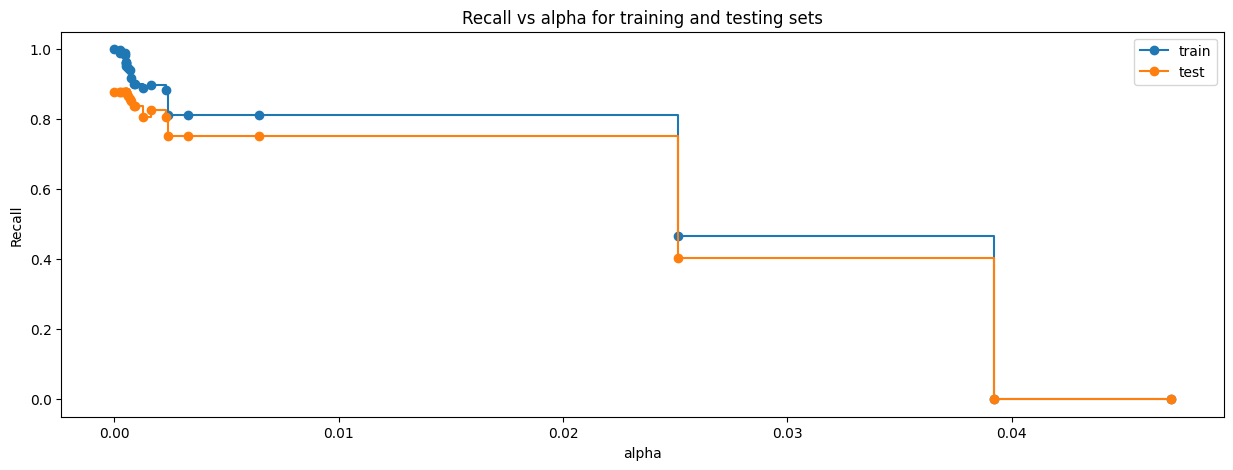

In [253]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

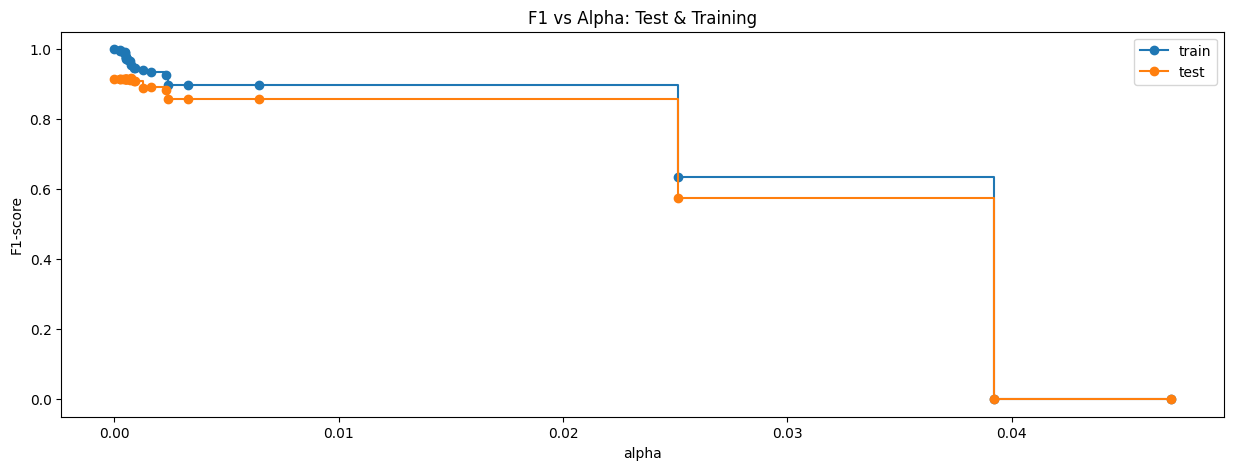

In [276]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1-score")
ax.set_title("F1 vs Alpha: Test & Training")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [282]:
index_best_model_recall = np.argmax(recall_test)
best_model_recall = clfs[index_best_model_recall]
float(best_model_recall.ccp_alpha)

0.0

In [283]:
index_best_model_f1 = np.argmax(f1_test)
best_model_f1 = clfs[index_best_model_f1]
float(best_model_f1.ccp_alpha)

0.0007619047619047619

In [371]:
# creating decision trees with best ccp_alpha values according to best recall and f1-score
# including class_weight parameter to mention class importance

dtree4 = DecisionTreeClassifier(ccp_alpha=best_model_recall.ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1)
dtree4.fit(X_train, y_train)

dtree5 = DecisionTreeClassifier(ccp_alpha=best_model_f1.ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1)
dtree5.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0007619047619047619),
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Training & Evaluating Tree on Alpha value with best Recall

**Checking performance on training data**

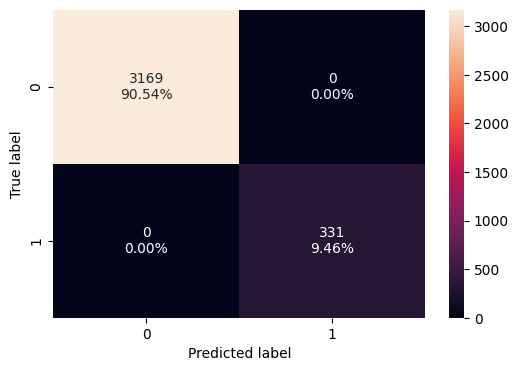

In [ ]:
classification_confusion_matrix(dtree4, X_train, y_train)

In [ ]:
dtree4_perf_train = classification_performance_metrics(dtree4, X_train, y_train)
dtree4_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [381]:
dtree4_complexity = model_complexity(dtree4)
dtree4_complexity

Depth  Number of leaves  Number of nodes
0     16                72              143

**Visualizing the Decision Tree**

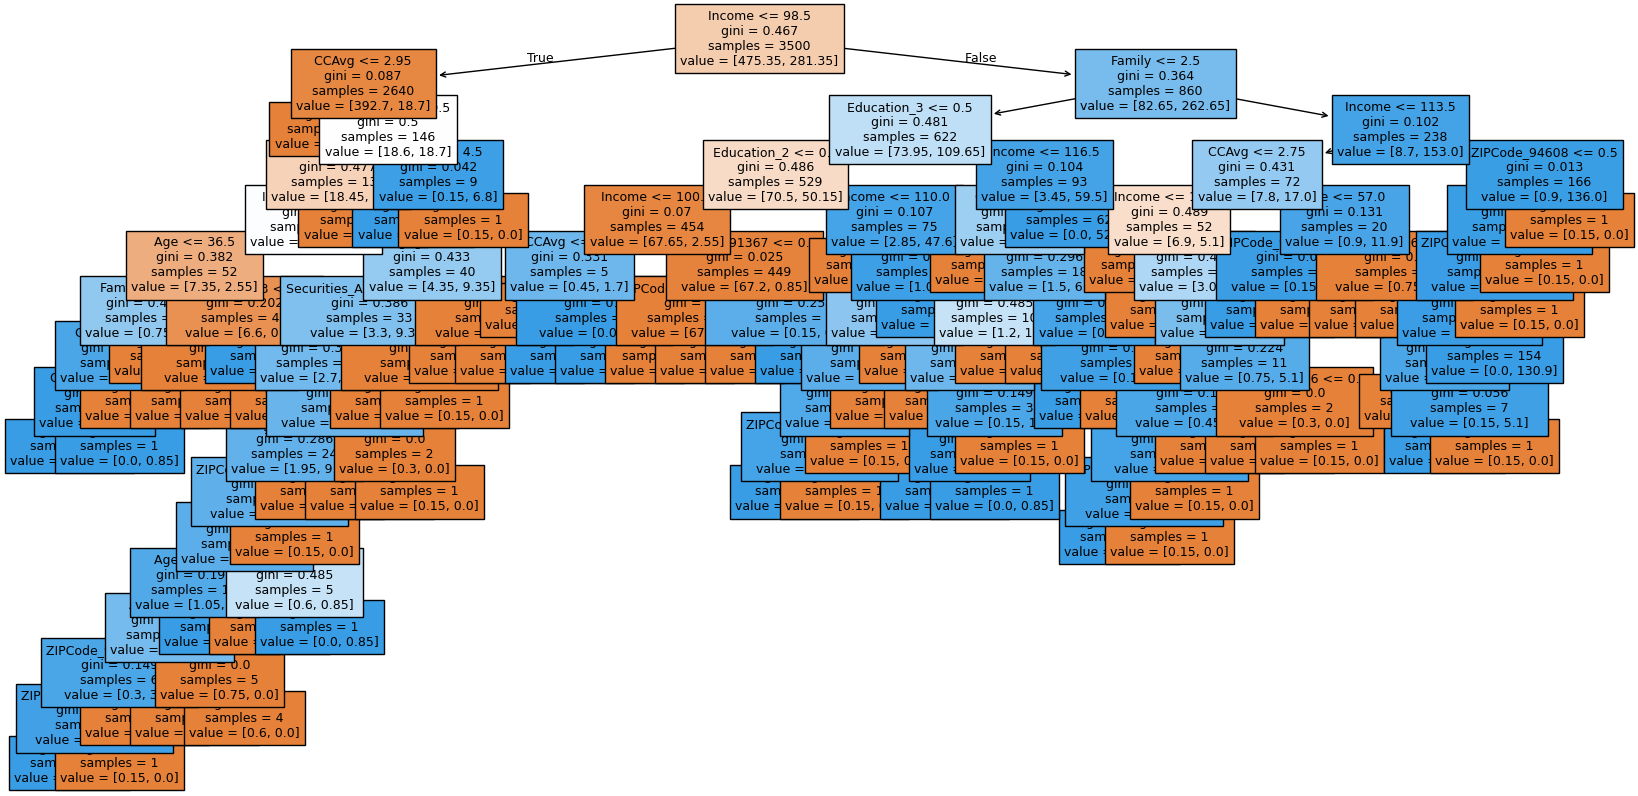

In [382]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dtree4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

plt.show()

Decision Rules:

In [376]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree4, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91203 <= 0.50
|   |   |   |   |   |   |   |--- ZIPCode_93907 <= 0.50
|   |   |   |   |   |   |   |   |--- weight

In [379]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


post_prune_recall_importances = pd.DataFrame(dtree4.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
filtered_pp_imp_recall = post_prune_recall_importances[post_prune_recall_importances['Imp'] > 0.005]
filtered_pp_imp_recall

Imp
Income       0.591613
Education_2  0.136686
CCAvg        0.078673
Education_3  0.067619
Family       0.065419
Age          0.019640
CD_Account   0.011000
Mortgage     0.005821

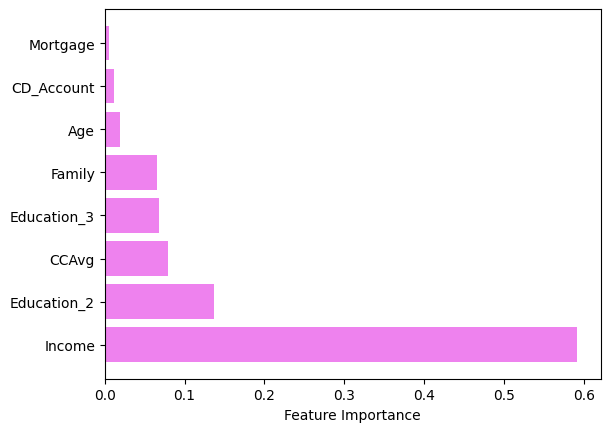

In [380]:
plt.barh(range(len(filtered_pp_imp_recall)), filtered_pp_imp_recall['Imp'], color="violet", align="center")
plt.yticks(range(len(filtered_pp_imp_recall)), [filtered_pp_imp_recall.index[i] for i in range(len(filtered_pp_imp_recall))])
plt.xlabel("Feature Importance")
plt.show()

**Checking performance on test data**

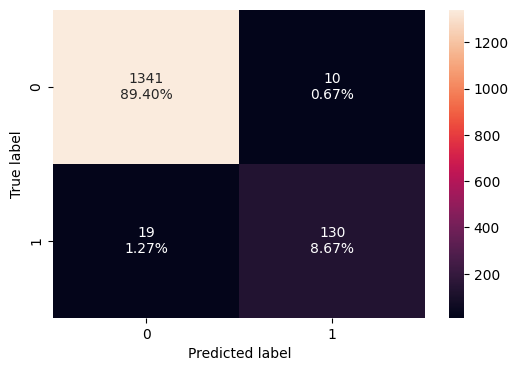

In [ ]:
classification_confusion_matrix(dtree4, X_test, y_test) 

In [ ]:
dtree4_perf_test = classification_performance_metrics(dtree4, X_test, y_test) 
dtree4_perf_test

Accuracy    Recall  Precision        F1
0  0.980667  0.872483   0.928571  0.899654

#### Training & Evaluating Tree on Alpha value with best F1-Score

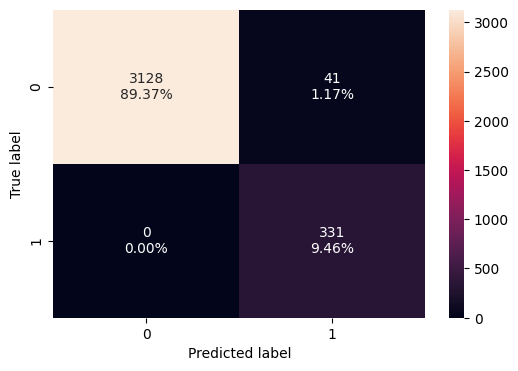

In [ ]:
classification_confusion_matrix(dtree5, X_train, y_train) 

In [ ]:
dtree5_perf_train = classification_performance_metrics(dtree5, X_train, y_train)
dtree5_perf_train

Accuracy  Recall  Precision        F1
0  0.988286     1.0   0.889785  0.941679

In [392]:
dtree5_complexity = model_complexity(dtree5)
dtree5_complexity

Depth  Number of leaves  Number of nodes
0      7                30               59

Visualizing the Tree

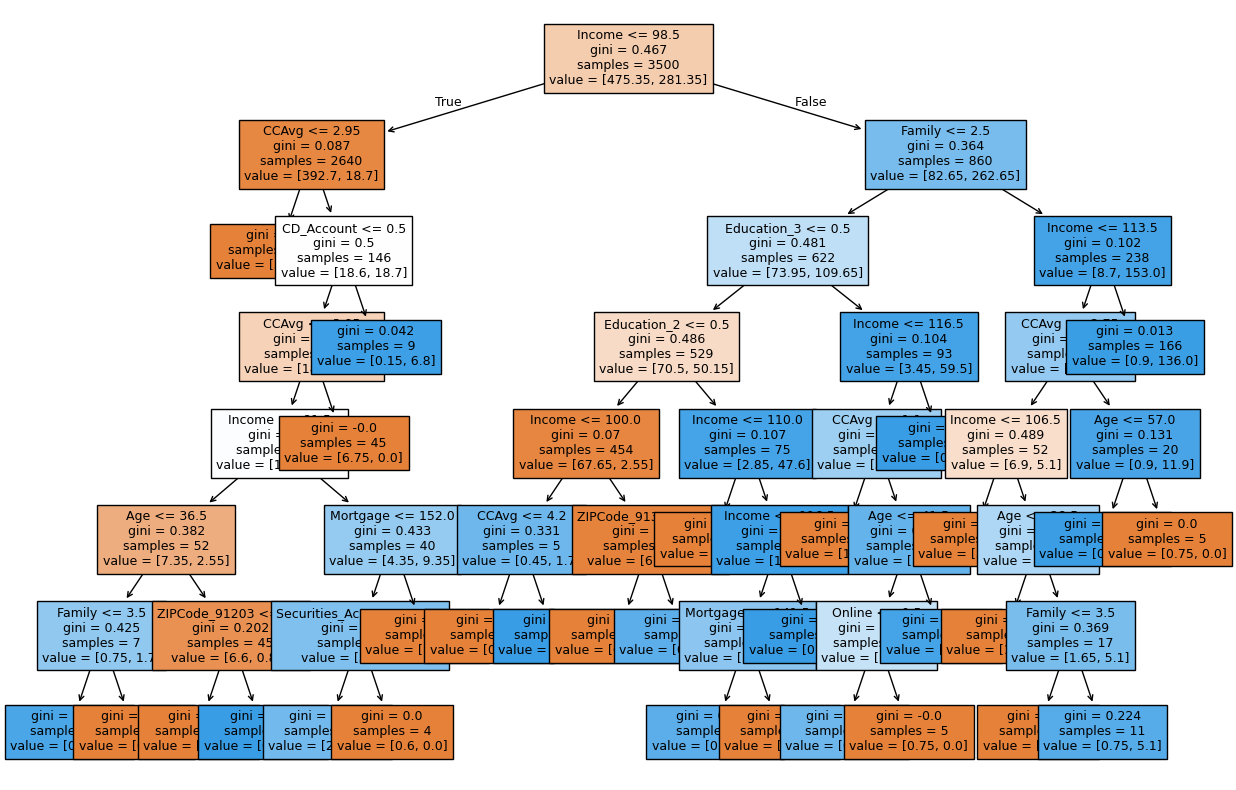

In [386]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    dtree5,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

plt.show()

Decision Rules:

In [387]:
print(tree.export_text(dtree5, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91203 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.60, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91203 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <= 152.00
|   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |--- weights: [2.70, 9.35] class: 1
|   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   

Feature Importance

In [388]:
post_prune_f1_importances = pd.DataFrame(dtree5.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
filtered_pp_imp_f1 = post_prune_f1_importances[post_prune_f1_importances['Imp'] > 0.005]
filtered_pp_imp_f1

Imp
Income       0.607964
Education_2  0.140850
CCAvg        0.074937
Education_3  0.067628
Family       0.066735
Age          0.012784
CD_Account   0.011335
Mortgage     0.005194

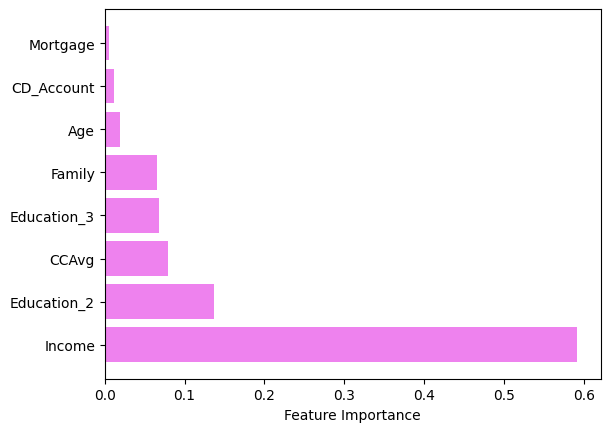

In [389]:
plt.barh(range(len(filtered_pp_imp_recall)), filtered_pp_imp_recall['Imp'], color="violet", align="center")
plt.yticks(range(len(filtered_pp_imp_recall)), [filtered_pp_imp_recall.index[i] for i in range(len(filtered_pp_imp_recall))])
plt.xlabel("Feature Importance")
plt.show()

**Checking performance on test data**

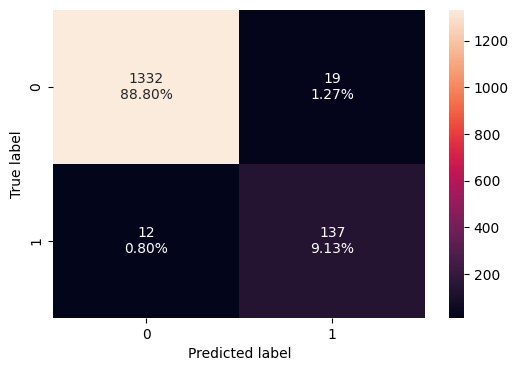

In [390]:
classification_confusion_matrix(dtree5, X_test, y_test)

In [391]:
dtree5_perf_test = classification_performance_metrics(dtree5, X_test, y_test)
dtree5_perf_test

Accuracy    Recall  Precision        F1
0  0.979333  0.919463   0.878205  0.898361

## Model Performance Comparison and Final Model Selection

In [394]:
# training performance comparison

models_train_comp_df = pd.concat([dtree1_perf_train.T, dtree2_perf_train.T, dtree3_perf_train.T, dtree4_perf_train.T, dtree5_perf_train.T], axis=1)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning-1)", "Decision Tree (Pre-Pruning-2)", "Decision Tree (Post-Pruning-1)", "Decision Tree (Post-Pruning-2)"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning-1)  \
Accuracy                               1.0                       0.790286   
Recall                                 1.0                       1.000000   
Precision                              1.0                       0.310798   
F1                                     1.0                       0.474212   

           Decision Tree (Pre-Pruning-2)  Decision Tree (Post-Pruning-1)  \
Accuracy                        0.976286                             1.0   
Recall                          1.000000                             1.0   
Precision                       0.799517                             1.0   
F1                              0.888591                             1.0   

           Decision Tree (Post-Pruning-2)  
Accuracy                         0.988286  
Recall                           1.000000  
Precision                        0.889785  
F1                               0.941679

In [395]:
# testing performance comparison

models_test_comp_df = pd.concat([dtree1_perf_test.T, dtree2_perf_test.T, dtree3_perf_test.T, dtree4_perf_test.T, dtree5_perf_test.T], axis=1)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning-1)", "Decision Tree (Pre-Pruning-2)", "Decision Tree (Post-Pruning-1)", "Decision Tree (Post-Pruning-2)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning-1)  \
Accuracy                          0.984000                       0.779333   
Recall                            0.879195                       1.000000   
Precision                         0.956204                       0.310417   
F1                                0.916084                       0.473768   

           Decision Tree (Pre-Pruning-2)  Decision Tree (Post-Pruning-1)  \
Accuracy                        0.962667                        0.980667   
Recall                          0.966443                        0.872483   
Precision                       0.738462                        0.928571   
F1                              0.837209                        0.899654   

           Decision Tree (Post-Pruning-2)  
Accuracy                         0.979333  
Recall                           0.919463  
Precision                        0.878205  
F1                               0.898361

In [396]:
# complexity comparison

models_complexity_df = pd.concat([dtree1_complexity.T, dtree2_complexity.T, dtree3_complexity.T, dtree4_complexity.T, dtree5_complexity.T], axis=1)
models_complexity_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning-1)", "Decision Tree (Pre-Pruning-2)", "Decision Tree (Post-Pruning-1)", "Decision Tree (Post-Pruning-2)"]
print("Complexity Comparison")
models_complexity_df

Complexity Comparison


Decision Tree (sklearn default)  \
Depth                                          15   
Number of leaves                               43   
Number of nodes                                85   

                  Decision Tree (Pre-Pruning-1)  \
Depth                                         2   
Number of leaves                              4   
Number of nodes                               7   

                  Decision Tree (Pre-Pruning-2)  \
Depth                                         6   
Number of leaves                             27   
Number of nodes                              53   

                  Decision Tree (Post-Pruning-1)  \
Depth                                         16   
Number of leaves                              72   
Number of nodes                              143   

                  Decision Tree (Post-Pruning-2)  
Depth                                          7  
Number of leaves                              30  
Number of nodes                               59

Going by our criteria that we set earlier:

- Recall is the most important feature, and there is only 1 tree (Decision Tree Pre-Pruning-1) that gives us a recall of 1 on both training and test data.
- However, it should be noted that the Precision value for this associated tree is very low, which could mean that a large number of False Positives can be see using this tree which can occur business expense (this expense depends on how much business allocates to marketing)
- The Decision Tree Pre-Pruning-2 (dtree3) has adequate performance on Recall, Precision and F1-Scores. It has optimal size and it is the recommended model that can be used. 



## Actionable Insights and Business Recommendations

- **Insights**:

    - High income customers across almost every other domain are more likely to take out personal loans.
    - A visual inspection of the decision tree shows Income to be heavily favored for perfoming splits and decision making on data. Same is indicated by feature importance as well
    - There are high income individuals (outliers) who have not converted to personal loans.
    - High credit card spenders are also likely to apply for personal loans.  
    - Undergraduate/non-graduate people don't show much tendency for taking out loans. This includes across categories that have been observed to be loan applicants like the following combinations:
        - Undergraduates and high income
        - Undergraduates and high credit card spenders
        - Undergraduates and high mortage customers (this is comparatively lower than above two)
    - Similar to the undergraduates, observations can be made on small families (members 1-2) who don't show much tendency for loan applications:
        - High income and small family
        - High credit card spenders and small family
        - High mortgage and small family (also comparatively lower)
    - Younger individuals seem to be more likely for loan applications
    

- **Business Recommendations**:

    - Launch VIP/Premium Load Products for the high income outliers. Offer benefits such as concierge processing or higher loan limits
    - Make targetted marketing campaigns towards undergraduate segment. It is possible that some individuals are paying off loans(quite possibly have dropped out due to these payments) so alternate messaging that pivot away from words like "loan" and "debt" may help
    - Use "Family Expansion" loans to market towards families of low size, target individuals who may have moved from 2-person to 3-person homes
    - Target high credit card spenders with incentives like lower monthly payments
    - Prioritize mobile applications ads and social media platforms for targetting younger demographic
    - Target marketing towards individuals looking for a higher mortgage


___